# ML Assignment 2


##  Team Members

-  Aitazaz  Ali,  s4004062

## 1. Introduction

- **Bullet Points Overview:**
  - **Goal:** Build predictive models for classifying histopathelogy images of collon cells:
    - *cellType*: need to classify type of cell.
    - *isCancerous*: need to classify if cell is a cancerous cell.

---

## 2. Exploratory Data Analysis (EDA)

# Handling Imbalanced Data

### Cancerous vs Not Cancerous

- It is **Imbalanced**: There are approximately 6,000 *not cancerous* examples versus approximately 4,000 *cancerous* examples (See Figure 1).
- If the model **guesses** (without learning) *not cancerous* 60% of the time, it would achieve 60% accuracy on the training set.
- Therefore, **performance metrics must be robust**, such as using the **F1-Score**.
- The model could **overfit** to predicting *not cancerous*.
  - To prevent this, ensure that **train, validation, and test sets** have a valid distribution of both classes.
  - This ensures that **overfitting is detected** when poor predictions are reflected in performance metrics.

## Cell Type Classification

- Cell type also **Imbalanced** (See Figure 2):
  - Type 2: ~4,000 examples
  - Type 1: ~2,500 examples
  - Type 0: ~2,000 examples
  - Type 3: ~1,500 examples
- If the model **guesses** Type 2 cells 40% of the time (without learning patterns), it would achieve 40% accuracy.
- The model may not learn **characteristic patterns** for each cell type equally.
  - Learning patterns for just Type 1 and Type 2 could lead to ~65% accuracy.

## Other Insights Into Potential Issues



- There is no null values in any column of dataset.
- See figure 9, 10, 11 for some example images of each cellType
    - None suffer from embedded text issues
    - Given it is a 27x27 image and We are still able to decipher the shapes of the cells. It does not seem suffer from problematic blur.   

## Addressing Class Imbalance

- Use robust performance metrics (F1-Score) and validation techniques to reduce the effects of class imbalance.
- **Cross-validation** can provide a more robust estimate of model performance by evaluating across multiple data subsets.
  - Helps expose the model to different training set distributions.
- **Augmentation** can help balance class distributions.
- Aim to construct batches that equally represent all classes.
  - But this can be difficult to implement effectively.

---
## 2. Data Splitting and Approach

## Data Splitting Strategy

- The ~9000 images are from 60 patients (main dataset). Each patient has different count of cellTypes (See Figure 4, 5, 6, 7). But only the epithelial cells show cancerous status in the main set. (See Figure 3)  
  - There is ~4000 cancerous cell types, all are epithelial cells but not all patients have epithelial cells. (See Figure 3)

- **What we will do**
  - We split the examples based on patientID
  - We divide patients into three groups: test, validation and train 
      - Each group will have relatively same amount cancerous vs non-cancerous as is present in the whole dataset. (~40% ) 
        - This ensures each group is a good representative of the whole dataset. 
      - Each group will also have relatively same amount of each cellType as is representative of the whole dataset. 
        - Therefore, need to ensure patients grouped for each split can provide sufficient images of each cellType.  
    - This could cause high variance as the train split is not good representative 
    - This could cause high bias as the model starts to guess/make assumptions about the patterns instead of learning. 

---
## 3. Preprocessing

## Data Handling Methods

-  We have 9896 pictures. However, there is class imbalance. Could augment existing images for certain class types to get balanced classes. 
-  We can use **normalisation**. Helps model learn patterns. Each pixel of image is a feature. The network learns how important each feature is.  Normalising helps the network fairly evaluate how important each pixel really is.  Otherwise, they might over prioritise pixels with higher values in the learning process. 
-  **Data Augmentation** to help data imbalance by creating more examples of miniority classes. 

---


In [4]:
# import zipfile
# with zipfile.ZipFile('./Image_classification_data.zip', 'r') as zip_ref:
#     zip.ref.extractall('./')

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd

data = pd.read_csv('./Image_classification_data/data_labels_mainData.csv')
data.head()

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous
0,22405,1,22405.png,fibroblast,0,0
1,22406,1,22406.png,fibroblast,0,0
2,22407,1,22407.png,fibroblast,0,0
3,22408,1,22408.png,fibroblast,0,0
4,22409,1,22409.png,fibroblast,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9896 entries, 0 to 9895
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   InstanceID    9896 non-null   int64 
 1   patientID     9896 non-null   int64 
 2   ImageName     9896 non-null   object
 3   cellTypeName  9896 non-null   object
 4   cellType      9896 non-null   int64 
 5   isCancerous   9896 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 464.0+ KB
None


Check if any nulls 
InstanceID      0
patientID       0
ImageName       0
cellTypeName    0
cellType        0
isCancerous     0
dtype: int64


Summary data statistics 
         InstanceID    patientID     cellType  isCancerous
count   9896.000000  9896.000000  9896.000000  9896.000000
mean   10193.880154    29.762025     1.501516     0.412187
std     6652.912660    17.486553     0.954867     0.492253
min        1.000000     1.000000     0.000000     0.000000
25%     4135.750000    14.000000    

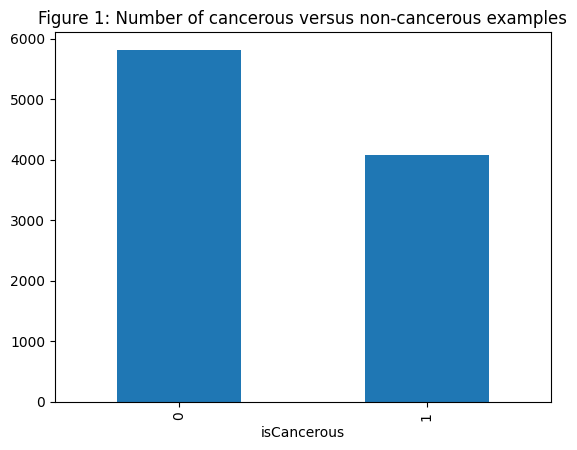

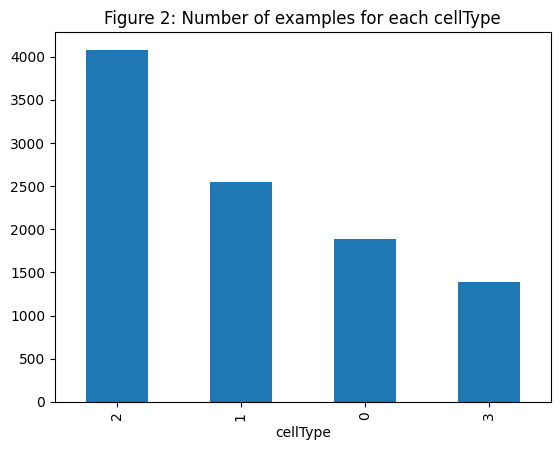

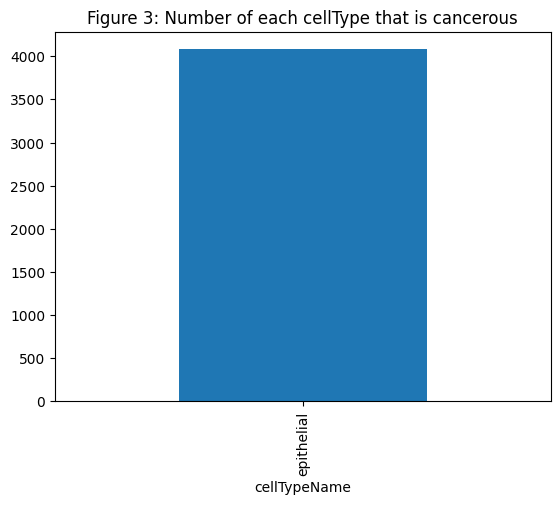

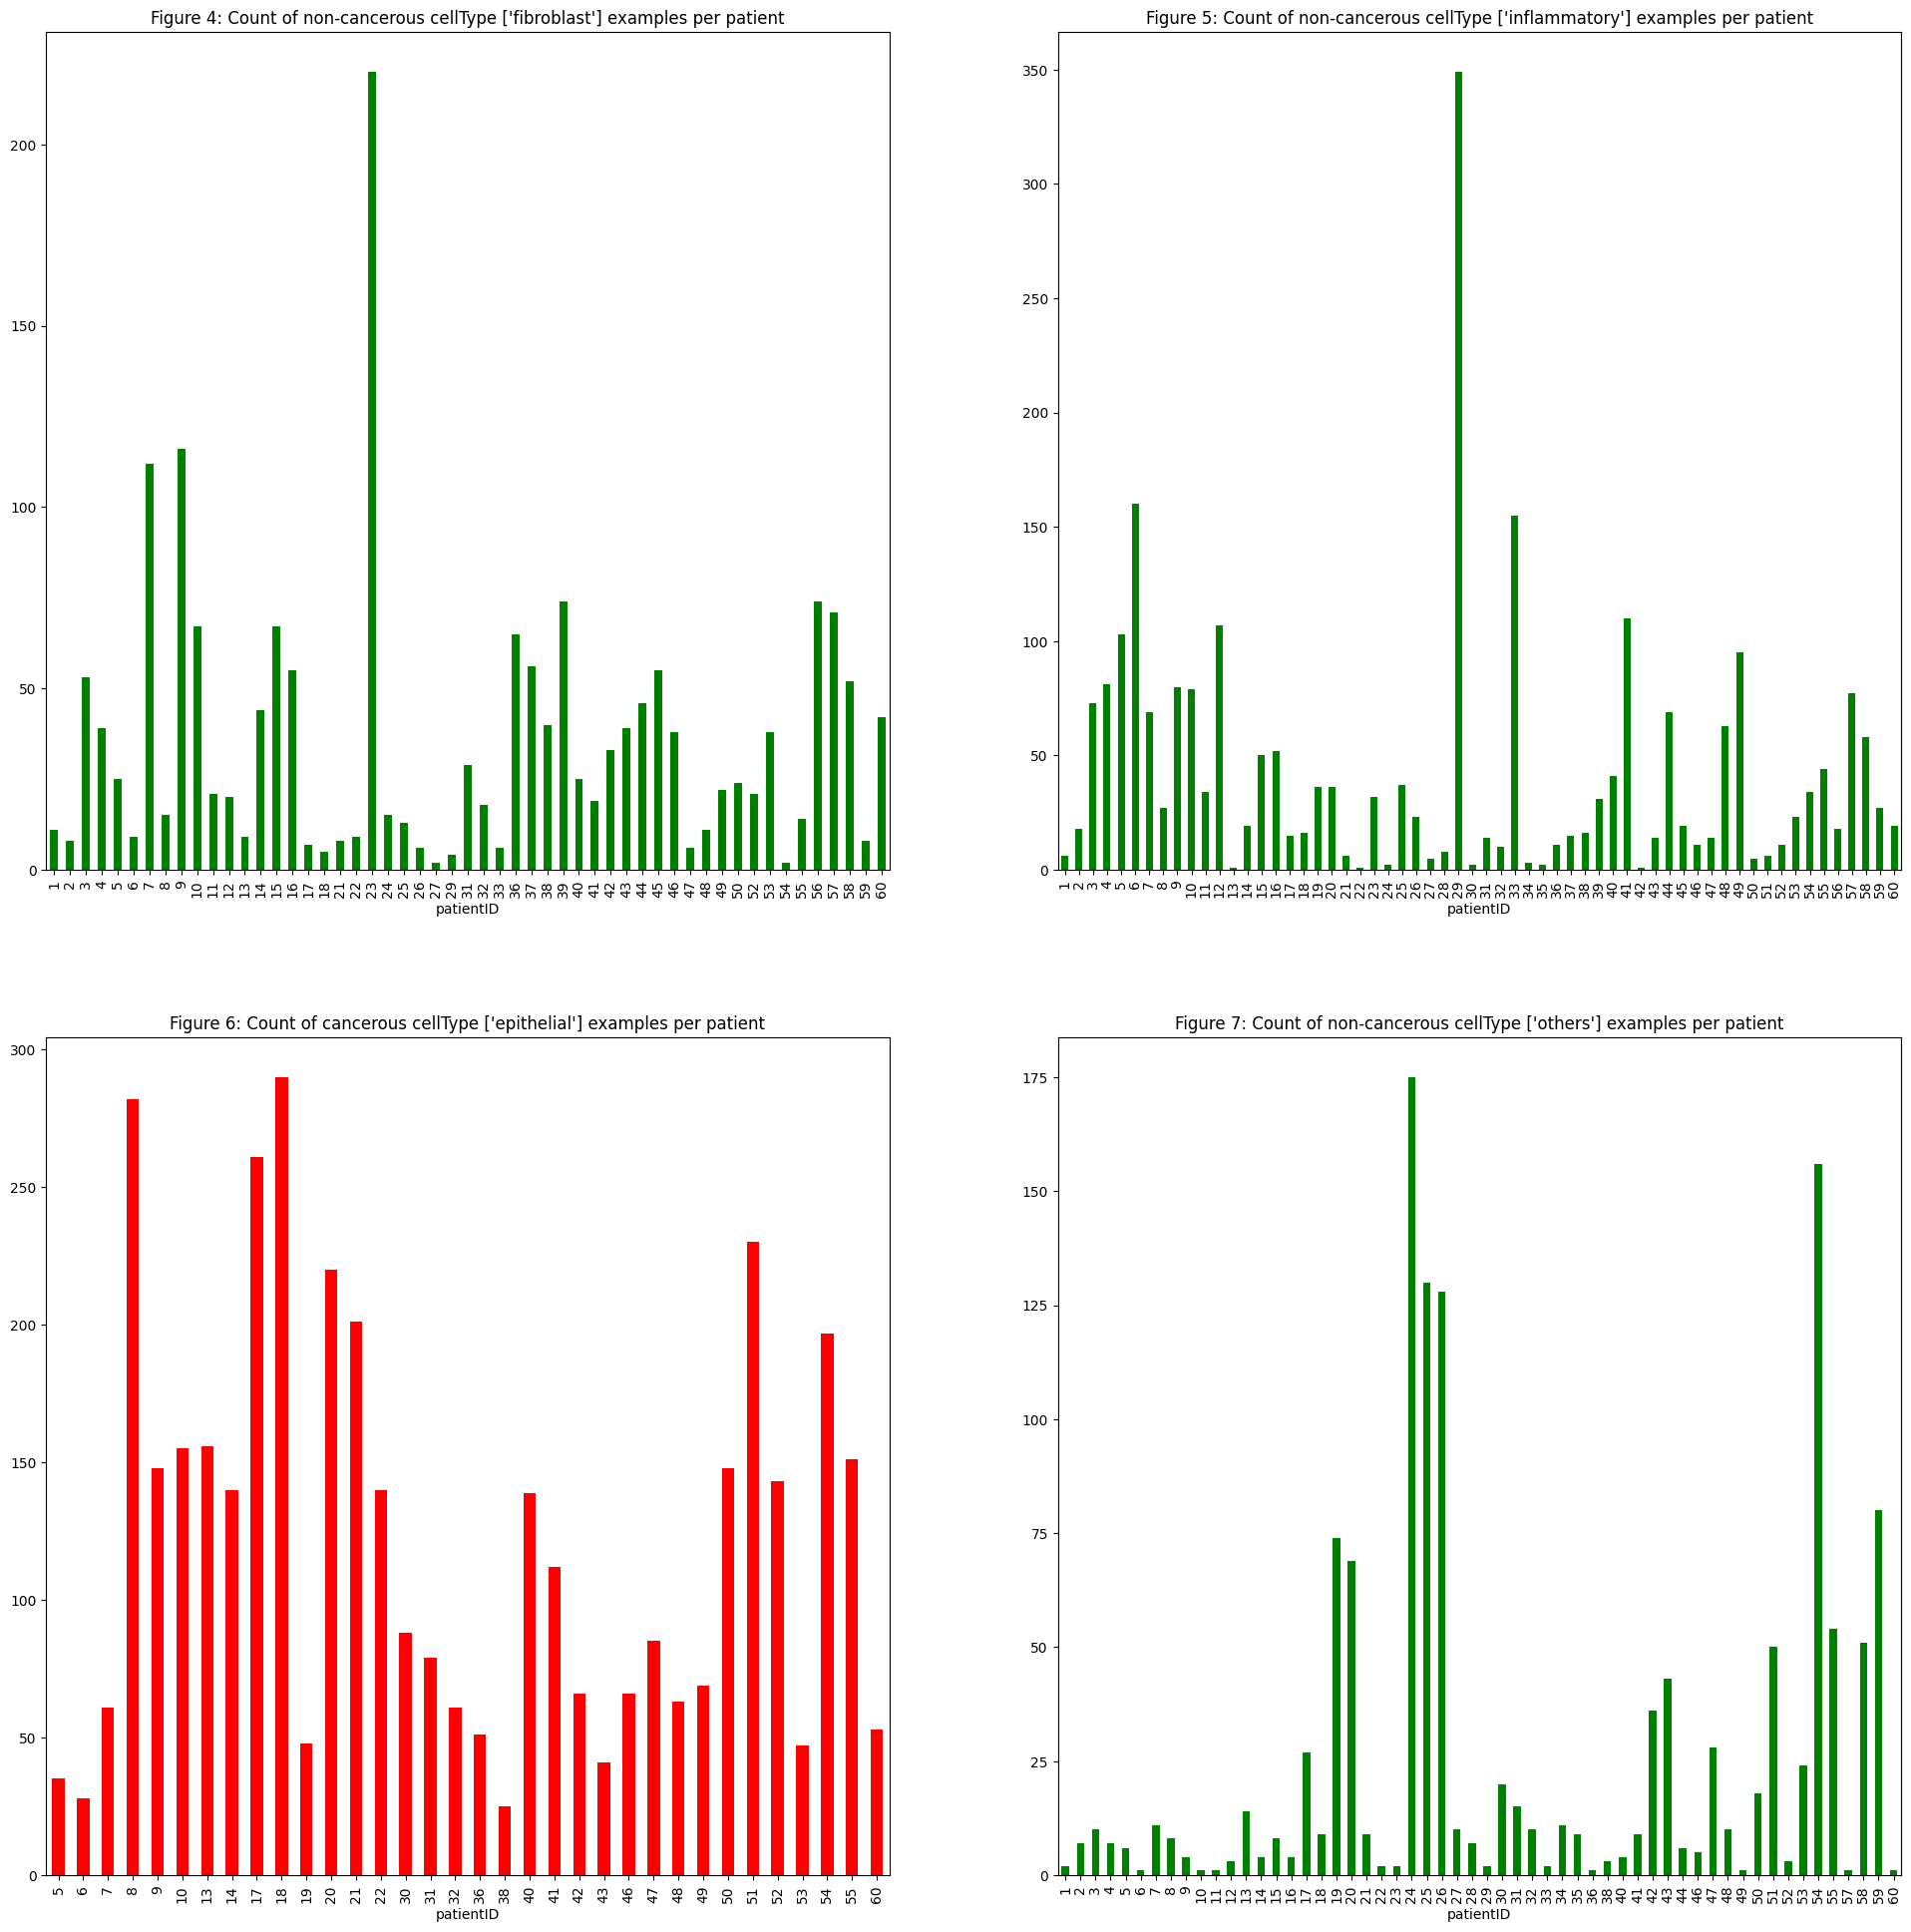

/tmp/ipykernel_18175/3381537827.py:58: FutureWarning: The plugin infrastructure in `skimage.io` and the parameter `plugin` are deprecated since version 0.25 and will be removed in 0.27 (or later). To avoid this warning, please do not use the parameter `plugin`. Instead, use `imageio` or other I/O packages directly. See also `imread`.
  im = imread(f'./Image_classification_data/patch_images/{image_path}', as_gray=False, plugin=None)
/tmp/ipykernel_18175/3381537827.py:58: FutureWarning: The plugin infrastructure in `skimage.io` and the parameter `plugin` are deprecated since version 0.25 and will be removed in 0.27 (or later). To avoid this warning, please do not use the parameter `plugin`. Instead, use `imageio` or other I/O packages directly. See also `imread`.
  im = imread(f'./Image_classification_data/patch_images/{image_path}', as_gray=False, plugin=None)
/tmp/ipykernel_18175/3381537827.py:58: FutureWarning: The plugin infrastructure in `skimage.io` and the parameter `plugin` are d

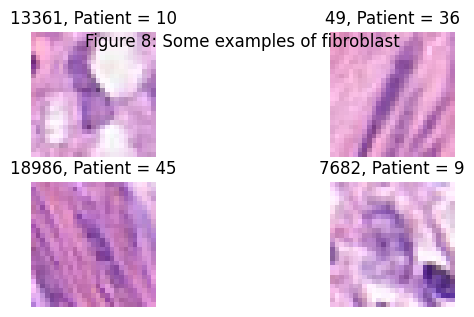

/tmp/ipykernel_18175/3381537827.py:58: FutureWarning: The plugin infrastructure in `skimage.io` and the parameter `plugin` are deprecated since version 0.25 and will be removed in 0.27 (or later). To avoid this warning, please do not use the parameter `plugin`. Instead, use `imageio` or other I/O packages directly. See also `imread`.
  im = imread(f'./Image_classification_data/patch_images/{image_path}', as_gray=False, plugin=None)
/tmp/ipykernel_18175/3381537827.py:58: FutureWarning: The plugin infrastructure in `skimage.io` and the parameter `plugin` are deprecated since version 0.25 and will be removed in 0.27 (or later). To avoid this warning, please do not use the parameter `plugin`. Instead, use `imageio` or other I/O packages directly. See also `imread`.
  im = imread(f'./Image_classification_data/patch_images/{image_path}', as_gray=False, plugin=None)
/tmp/ipykernel_18175/3381537827.py:58: FutureWarning: The plugin infrastructure in `skimage.io` and the parameter `plugin` are d

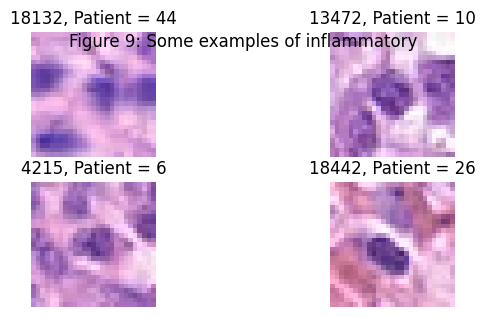

/tmp/ipykernel_18175/3381537827.py:58: FutureWarning: The plugin infrastructure in `skimage.io` and the parameter `plugin` are deprecated since version 0.25 and will be removed in 0.27 (or later). To avoid this warning, please do not use the parameter `plugin`. Instead, use `imageio` or other I/O packages directly. See also `imread`.
  im = imread(f'./Image_classification_data/patch_images/{image_path}', as_gray=False, plugin=None)
/tmp/ipykernel_18175/3381537827.py:58: FutureWarning: The plugin infrastructure in `skimage.io` and the parameter `plugin` are deprecated since version 0.25 and will be removed in 0.27 (or later). To avoid this warning, please do not use the parameter `plugin`. Instead, use `imageio` or other I/O packages directly. See also `imread`.
  im = imread(f'./Image_classification_data/patch_images/{image_path}', as_gray=False, plugin=None)
/tmp/ipykernel_18175/3381537827.py:58: FutureWarning: The plugin infrastructure in `skimage.io` and the parameter `plugin` are d

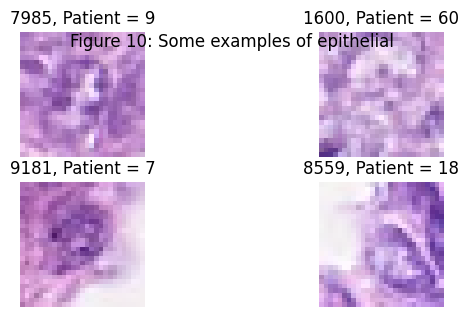

/tmp/ipykernel_18175/3381537827.py:58: FutureWarning: The plugin infrastructure in `skimage.io` and the parameter `plugin` are deprecated since version 0.25 and will be removed in 0.27 (or later). To avoid this warning, please do not use the parameter `plugin`. Instead, use `imageio` or other I/O packages directly. See also `imread`.
  im = imread(f'./Image_classification_data/patch_images/{image_path}', as_gray=False, plugin=None)
/tmp/ipykernel_18175/3381537827.py:58: FutureWarning: The plugin infrastructure in `skimage.io` and the parameter `plugin` are deprecated since version 0.25 and will be removed in 0.27 (or later). To avoid this warning, please do not use the parameter `plugin`. Instead, use `imageio` or other I/O packages directly. See also `imread`.
  im = imread(f'./Image_classification_data/patch_images/{image_path}', as_gray=False, plugin=None)
/tmp/ipykernel_18175/3381537827.py:58: FutureWarning: The plugin infrastructure in `skimage.io` and the parameter `plugin` are d

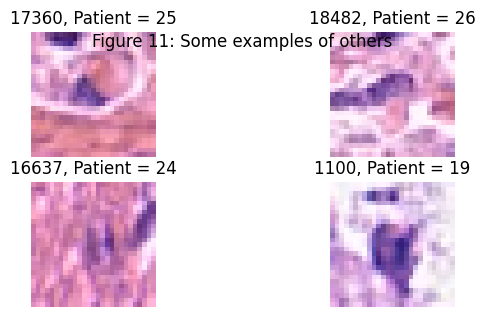

In [2]:
# from PIL import Image
import matplotlib.pyplot as plt
from skimage.feature import hog
# from skimage import data, exposure
from skimage.io import imread
from skimage.color import rgba2rgb, rgb2gray

print(data.info())
print(f'\n\nCheck if any nulls \n{data.isnull().sum()}')
print(f'\n\nSummary data statistics \n{data.describe()}')


# Below plots show count for isCancerous and cellType.
# Also the plot for which isCancerous count for each cellType 
data['isCancerous'].value_counts().plot(kind='bar', title='Figure 1: Number of cancerous versus non-cancerous examples')
plt.show()
data['cellType'].value_counts().plot(kind='bar', title='Figure 2: Number of examples for each cellType')
plt.show()
data[data['isCancerous'] == 1]['cellTypeName'].value_counts().plot(kind='bar', title='Figure 3: Number of each cellType that is cancerous')
plt.show()


# Below plots the amount of each cellType for each patientID
plt.figure(figsize=(24, 24))
figindex = 3
for i in range(0, 4):
    plt.subplot(2, 2, i + 1)
    # Get rows where cellType = i and get value count of each patientID (how many patients have that cellType)
    byCellTypeCountCancerous = data[(data['cellType'] == i) & (data['isCancerous'] == 1)]['patientID'].value_counts().sort_index()
    byCellTypeCountNotCancerous = data[(data['cellType'] == i) & (data['isCancerous'] == 0)]['patientID'].value_counts().sort_index()
    if len(byCellTypeCountCancerous) > 0:
        figindex += 1
        byCellTypeCountCancerous.plot(kind='bar', color='red', title=f'Figure {figindex}: Count of cancerous cellType {data[data['cellType'] == i]['cellTypeName'].unique()} examples per patient')
    if len(byCellTypeCountNotCancerous) > 0:
        figindex += 1
        byCellTypeCountNotCancerous.plot(kind='bar', label='isCancerous = 0', color='green', title=f'Figure {figindex}: Count of non-cancerous cellType {data[data['cellType'] == i]['cellTypeName'].unique()} examples per patient')
    
plt.show()

# Below plots example images for each cellType
import math

figIndex = 7
celltype_dict = {}
for cell in data['cellType'].unique():
    celltype_dict[cell] = data[data['cellType'] == cell]


for i in range (len(celltype_dict)):
    celltype = celltype_dict[i]
    num = 8
    col = 2
    row = math.ceil(num/col)
    plt.figure(figsize=(col * 3, row * 3))
    sample = celltype.sample(n=4)
    for j in range(len(sample)):
        image_path = sample.iloc[j]['ImageName']
        im = imread(f'./Image_classification_data/patch_images/{image_path}', as_gray=False, plugin=None)
        plt.subplot(num, col, j + 1)
        plt.title(f'{sample.iloc[j]['InstanceID']}, Patient = {sample.iloc[j]['patientID']}')
        plt.imshow(im, cmap=plt.cm.gray)
        plt.axis('off')
    plt.tight_layout(pad=0.1, h_pad=0.2, w_pad=0.0)
    figindex += 1
    plt.suptitle(f'Figure {figindex}: Some examples of {sample.iloc[1]['cellTypeName']}')
    plt.show()

In [3]:
# Data splitting

patient_dict = {}
for id  in data['patientID'].unique():
    patient_dict[id] = data[data['patientID'] == id]

patients_groupByCancerous = {}
patients_groupByNonCancerous = {}
for id, value in patient_dict.items():
    if patient_dict[id]['isCancerous'].eq(1).any():
        patients_groupByCancerous[id] = value
    else:
        patients_groupByNonCancerous[id] = value

print(f'Total number of patients is: {len(patients_groupByCancerous) + len(patients_groupByNonCancerous)}')
print(f'With {len(patients_groupByCancerous)} patients with a cancerous cell versus {len(patients_groupByNonCancerous)} patients with no cancerous cells')

# cancerousExamples = data[data['isCancerous'] == 1]
# nonCancerousExamples = data[data['isCancerous'] == 0]

# cancerousExamples_groupbypatient = {}
# for id in cancerousExamples['patientID'].unique():
#     cancerousExamples_groupbypatient[id] = cancerousExamples[cancerousExamples['patientID'] == id]

# nonCancerousExamples_groupbypatient = {}
# for id in nonCancerousExamples['patientID'].unique():
#     nonCancerousExamples_groupbypatient[id] = nonCancerousExamples[nonCancerousExamples['patientID'] == id]

TRAIN_SPLIT_PERCENT = 0.80
VALID_SPLIT_PERCENT = 0.20
TEST_SPLIT_PERCENT = 0.80
TOTAL_IMAGES = len(data)
RATIO = len(data[data['isCancerous'] == 1]) / TOTAL_IMAGES

train = pd.DataFrame(columns=data.columns)
test = pd.DataFrame(columns=data.columns)
val = pd.DataFrame(columns=data.columns)

# Pick random patients from canerous and non cancerous group 
train_split_Cancerous_keys = pd.DataFrame(list(patients_groupByCancerous.keys()), columns=['patientID']).sample(frac=TRAIN_SPLIT_PERCENT, random_state=10).reset_index(drop=True)
train_split_nonCancerous_keys = pd.DataFrame(list(patients_groupByNonCancerous.keys()), columns=['patientID']).sample(frac=TRAIN_SPLIT_PERCENT, random_state=10).reset_index(drop=True)

# From the train set pick random patients for val set
val_split_Cancerous_keys = train_split_Cancerous_keys.sample(frac=VALID_SPLIT_PERCENT, random_state=10).reset_index(drop=True)
val_split_nonCancerous_keys = train_split_nonCancerous_keys.sample(frac=VALID_SPLIT_PERCENT, random_state=10).reset_index(drop=True)


print(f'- For train set, picked {len(train_split_Cancerous_keys)} patients out of {len(patients_groupByCancerous)} patients with cancerous cells')
# print(f'They are \n {train_split_Cancerous_keys}')
print(f'- For train set, picked {len(train_split_nonCancerous_keys)} patients out of {len(patients_groupByNonCancerous)} patients with non cancerous cells')
print(f'- Therefore, there is a ratio of cancerous to total patients in train set of {len(train_split_Cancerous_keys)/(len(train_split_nonCancerous_keys) + len(train_split_Cancerous_keys))} ')
print(f'- Therefore, there is a ratio of cancerous to total patients in test set of {(len(train_split_Cancerous_keys ) - len(patients_groupByCancerous)) /(len(train_split_nonCancerous_keys) + len(train_split_Cancerous_keys) - (len(patients_groupByNonCancerous) + len(patients_groupByCancerous)))} ')

print(f'- For val set, picked {len(val_split_Cancerous_keys)} patients out of {len(train_split_Cancerous_keys)} train set patients with cancerous cells')
print(f'- For val set, picked {len(val_split_nonCancerous_keys)} patients out of {len(train_split_nonCancerous_keys)} train set patients with non cancerous cells')
print(f'- Therefore, there is a ratio of cancerous to total patient in val set of {len(val_split_Cancerous_keys)/(len(val_split_Cancerous_keys) + len(val_split_nonCancerous_keys))}')

# Now based on picks for train set place the patients in the train set otherwise in the test set.
for id, key in patients_groupByCancerous.items():
    # If key of patient is selected for train then place it in the train set else in the test set
    if train_split_Cancerous_keys['patientID'].eq(id).any():
        if val_split_Cancerous_keys['patientID'].eq(id).any():
            val = pd.concat([val, patients_groupByCancerous[id]], ignore_index=True)
        else:
            train = pd.concat([train, patients_groupByCancerous[id]], ignore_index=True)
    else:
        test = pd.concat([test, patients_groupByCancerous[id]], ignore_index=True)

for id, key in patients_groupByNonCancerous.items():
    # If key of patient is selected for train then place it in the train set else in the test set
    if train_split_nonCancerous_keys['patientID'].eq(id).any():
        if val_split_nonCancerous_keys['patientID'].eq(id).any():
            val = pd.concat([val, patients_groupByNonCancerous[id]], ignore_index=True)
        else:
            train = pd.concat([train, patients_groupByNonCancerous[id]], ignore_index=True)
    else:
        test = pd.concat([test, patients_groupByNonCancerous[id]], ignore_index=True)

print(f'- There is {len(train['patientID'].unique())} patients in the train set. The count for each cell type is:\n{train['cellType'].value_counts()}')
print(f'- There is {len(val['patientID'].unique())} patients in the val set. The count for each cell type is:\n{val['cellType'].value_counts()}')
print(f'- There is {len(test['patientID'].unique())} patients in the test set. The count for each cell type is:\n{test['cellType'].value_counts()}')
print(f'- Therefore, ratio of train to total is: {len(train)/ len(data)} versus the ratio of test to total: {len(test)/len(data)}')
print(f'- Therefore, ratio of val to train is: {len(val)/len(train)}, and the ratio of val to total is: {len(val)/len(data)}') 

print(f'- The value counts for isCancerous for train set is:\n{train['isCancerous'].value_counts()}')
print(f'- The value counts for isCancerous for val set is:\n{val['isCancerous'].value_counts()}')
print(f'- The value counts for isCancerous for test set is:\n{test['isCancerous'].value_counts()}')
print(f'- The value counts for isCancerous for whole data set is:\n{data['isCancerous'].value_counts()}')


# I could make the splitter above modular but cannot be bothered for

Total number of patients is: 60
With 34 patients with a cancerous cell versus 26 patients with no cancerous cells
- For train set, picked 27 patients out of 34 patients with cancerous cells
- For train set, picked 21 patients out of 26 patients with non cancerous cells
- Therefore, there is a ratio of cancerous to total patients in train set of 0.5625 
- Therefore, there is a ratio of cancerous to total patients in test set of 0.5833333333333334 
- For val set, picked 5 patients out of 27 train set patients with cancerous cells
- For val set, picked 4 patients out of 21 train set patients with non cancerous cells
- Therefore, there is a ratio of cancerous to total patient in val set of 0.5555555555555556
- There is 39 patients in the train set. The count for each cell type is:
cellType
2    2630
0    1454
1    1447
3     930
Name: count, dtype: int64
- There is 9 patients in the val set. The count for each cell type is:
cellType
1    679
2    553
0    222
3    158
Name: count, dtype: i

In [4]:
def KFoldSplit(folds, train_split_percent):

    KFOLD_TRAIN_SPLIT_PERCENT = train_split_percent
    KFOLD_VALID_SPLIT_PERCENT = 1 / folds
    KFOLD_TEST_SPLIT_PERCENT = 1 - train_split_percent

    KFOLD_TOTAL_IMAGES = len(data)
    KFOLD_RATIO = len(data[data['isCancerous'] == 1]) / TOTAL_IMAGES

    # initialise the columns
    # train = pd.DataFrame(columns=data.columns)
    KFOLD_test = pd.DataFrame(columns=data.columns)
    # val = pd.DataFrame(columns=data.columns)
    folds_keys = {}
    folds_dict = {}
    for i in range(0, folds):
        folds_dict[i] = pd.DataFrame(columns=data.columns)
        folds_keys[i] = ()

    # Pick random patients from canerous and non cancerous group 
    KFOLD_train_split_Cancerous_keys = pd.DataFrame(list(patients_groupByCancerous.keys()), columns=['patientID']).sample(frac=KFOLD_TRAIN_SPLIT_PERCENT, random_state=10).reset_index(drop=True)
    KFOLD_train_split_nonCancerous_keys = pd.DataFrame(list(patients_groupByNonCancerous.keys()), columns=['patientID']).sample(frac=KFOLD_TRAIN_SPLIT_PERCENT, random_state=10).reset_index(drop=True)

    # From the train set pick random patients for each fold.
    # We do first fold manually so we have keys to pick the next fold from.
    # To find split percent we use formula (number of fold keys - (number of train keys / folds)) / number of keys
    # or: (size of fold key pool - target size of each fold) / size of fold key pool
    # folds_keys[0] = (train_split_Cancerous_keys.sample(frac=((len(train_split_Cancerous_keys)) - (len(train_split_Cancerous_keys)/folds)) / len(train_split_Cancerous_keys),
    #                                                     random_state=10).reset_index(drop=True), 
    #                  train_split_nonCancerous_keys.sample(frac=((len(train_split_Cancerous_keys)) - (len(train_split_Cancerous_keys)/folds)) / len(train_split_Cancerous_keys),
    #                                                        random_state=10).reset_index(drop=True))

    # pool of keys to pick the next fold from.
    # initally the pool is same as train keys pool but each (sequential) fold uses pool of previous fold
    # where each sequntial fold picks from keys in the pool provided by the previous fold
    # this enables the splitting. for train we pick examples not in fold 1. for fold 1 we pick examples not in fold  2. etc... 
    pool_split_Cancerous_keys = KFOLD_train_split_Cancerous_keys
    pool_split_nonCancerous_keys = KFOLD_train_split_nonCancerous_keys

    fold_cancerous_split = 1
    fold_nonCancerous_split = 1

    for idx, fold in folds_keys.items():
        

        folds_keys[idx] = (pool_split_Cancerous_keys.sample(frac=fold_cancerous_split, random_state=10).reset_index(drop=True), 
                     pool_split_nonCancerous_keys.sample(frac=fold_nonCancerous_split, random_state=10).reset_index(drop=True))
        
        pool_split_Cancerous_keys = folds_keys[idx][0]
        pool_split_nonCancerous_keys = folds_keys[idx][1] 
        

        fold_cancerous_split = (len(pool_split_Cancerous_keys) - (len(KFOLD_train_split_Cancerous_keys)/folds)) / len(pool_split_Cancerous_keys)
        fold_nonCancerous_split = (len(pool_split_nonCancerous_keys) - (len(KFOLD_train_split_nonCancerous_keys)/folds)) / len(pool_split_nonCancerous_keys)


    # now we have key pool splits where train contains pool of keys, fold1 contains pool of keys for fold2 ...  
    # here is the spool venn diagram(kind of)     [train [fold1 [fold 2 [fold 3 [fold 4]]]]]


    print(f'- For train set, picked {len(KFOLD_train_split_Cancerous_keys)} patients out of {len(patients_groupByCancerous)} patients with cancerous cells')
    # print(f'They are \n {train_split_Cancerous_keys}')
    print(f'- For train set, picked {len(KFOLD_train_split_nonCancerous_keys)} patients out of {len(patients_groupByNonCancerous)} patients with non cancerous cells')
    print(f'- Therefore, there is a ratio of cancerous to total patients in train set of {len(KFOLD_train_split_Cancerous_keys)/(len(KFOLD_train_split_nonCancerous_keys) + len(KFOLD_train_split_Cancerous_keys))} ')
    print(f'- Therefore, there is a ratio of cancerous to total patients in test set of {(len(KFOLD_train_split_Cancerous_keys ) - len(patients_groupByCancerous)) /(len(KFOLD_train_split_nonCancerous_keys) + len(KFOLD_train_split_Cancerous_keys) - (len(patients_groupByNonCancerous) + len(patients_groupByCancerous)))} ')

    for idx, fold in folds_keys.items():
        print(f'- For fold set {idx}, picked {len(fold[0])} patients out of {len(KFOLD_train_split_Cancerous_keys)} train set patients with cancerous cells')
        print(f'- For fold set {idx}, picked {len(fold[1])} patients out of {len(KFOLD_train_split_nonCancerous_keys)} train set patients with non cancerous cells')
        print(f'- Therefore, there is a ratio of cancerous to total patient in fold set {idx} of {len(fold[0])/(len(fold[0]) + len(fold[1]))}')


    # Now based on picks for train (and each fold) set place the patients in the train set (and each fold) otherwise in the test set.
    for id, key in patients_groupByCancerous.items():
        # If key of patient is selected for train then place it in the train set (in one of the folds) else in the test set
        if KFOLD_train_split_Cancerous_keys['patientID'].eq(id).any():
            target_fold = 0
            # iterate through all folds (1..2..3) then return the index last of last fold to have the key
            # the example belongs to that last fold.  refer to [train [fold1 [fold 2 [fold 3 [fold 4]]]]] for  why
            for idx, fold in folds_keys.items():
                if fold[0]['patientID'].eq(id).any():
                    target_fold = idx
                    
            folds_dict[target_fold] = pd.concat([folds_dict[target_fold], patients_groupByCancerous[id]], ignore_index=True)
            print(f'Adding isCancerous: patient:{id} to fold {target_fold}')
        else:
            KFOLD_test = pd.concat([KFOLD_test, patients_groupByCancerous[id]], ignore_index=True)

    for id, key in patients_groupByNonCancerous.items():
        # If key of patient is selected for train then place it in the train set else in the test set
        if KFOLD_train_split_nonCancerous_keys['patientID'].eq(id).any():
            target_fold = 0
            for idx, fold in folds_keys.items():
                if fold[1]['patientID'].eq(id).any():
                    target_fold = idx

            folds_dict[target_fold] = pd.concat([folds_dict[target_fold], patients_groupByNonCancerous[id]], ignore_index=True)
            print(f'Adding NonCancerous: patient{id} to fold {target_fold}')
        else:
            KFOLD_test = pd.concat([KFOLD_test, patients_groupByNonCancerous[id]], ignore_index=True)

        totLen = 0; 
    for idx, fold in folds_dict.items():
        print(f'- There is {len(fold['patientID'].unique())} patients in the fold set {idx}. The count for each cell type is:\n{fold['cellType'].value_counts()}')
        totLen += len(fold)

    print(f'- There is {len(train['patientID'].unique())} patients in the train set.')
    print(f'- There is {len(KFOLD_test['patientID'].unique())} patients in the test set. The count for each cell type is:\n{KFOLD_test['cellType'].value_counts()}')
    print(f'- Therefore, ratio of train to total is: {totLen/ len(data)} versus the ratio of test to total: {len(KFOLD_test)/len(data)}')

    for idx, fold in folds_dict.items():
        print(f'- Therefore, ratio of fold set {idx} to train is: {len(fold)/totLen}, and the ratio of fold set {idx} to total is: {len(fold)/len(data)}') 


    # print(f'- The value counts for isCancerous for train set is:\n{train['isCancerous'].value_counts()}')
    totLenCancerous = 0
    for idx, fold in folds_dict.items():
        print(f'- The value counts for isCancerous for fold set {idx} is:\n{fold['isCancerous'].value_counts()}')
        totLenCancerous += len(fold[fold['isCancerous'] == 1])
    
    print(f'- The value counts for isCancerous for train set is:\n{totLenCancerous}')
    print(f'- The value counts for isCancerous for test set is:\n{KFOLD_test['isCancerous'].value_counts()}')
    print(f'- The value counts for isCancerous for whole data set is:\n{data['isCancerous'].value_counts()}')

    return (folds_dict, KFOLD_test)
# I could make the splitter above modular but cannot be bothered for

In [7]:
folds = KFoldSplit(4, 0.8)

- For train set, picked 27 patients out of 34 patients with cancerous cells
- For train set, picked 21 patients out of 26 patients with non cancerous cells
- Therefore, there is a ratio of cancerous to total patients in train set of 0.5625 
- Therefore, there is a ratio of cancerous to total patients in test set of 0.5833333333333334 
- For fold set 0, picked 27 patients out of 27 train set patients with cancerous cells
- For fold set 0, picked 21 patients out of 21 train set patients with non cancerous cells
- Therefore, there is a ratio of cancerous to total patient in fold set 0 of 0.5625
- For fold set 1, picked 20 patients out of 27 train set patients with cancerous cells
- For fold set 1, picked 16 patients out of 21 train set patients with non cancerous cells
- Therefore, there is a ratio of cancerous to total patient in fold set 1 of 0.5555555555555556
- For fold set 2, picked 13 patients out of 27 train set patients with cancerous cells
- For fold set 2, picked 11 patients out

##  4. Base Model & Performence Metric Selection
## Performance Metrics Selection 
-  **Best choice is F1 Score**. It is harmonic mean of precision and recall. Precision minimises false positives, recall minimises false negatives. Both together guide model towards making positive predictions that are truly positive and not missing positive cases. 
    - Given imbalance in target values, to evaluate if model is learning characteristics of all classes – so they can discriminately predict classes instead of guessing one prevalent class. 
      - This means less guessing every class is one prevalent class. (Precision) 
      - This means model can better discriminate characteristics of each class (Recall/Sensitivity) 

## Base Model Selection & Justification
- CNN versus MLP for cellType classification
  - The problem with MLP is the large amount of layers required to achieve performance comparable to CNN.
    - This is because MLP tries to find/learn patterns using all the pixels at once. Not considering relevance of the pixel to the problem.
       - Seeing Figure 8, 9, 10, 11 we can notice how some pixels do provide any meaningful information yet the MLP will still utilise that to identify some abstract pattern. This means it struggles to learn meaningful patterns.
    - This means more layers are required to gain/learn enough high-level abstract patterns that can meaningfully idenitfy features of the image.
    - Consequently, more training would be required.
    - This could be solved by first applying some kernel function to highlight the relevant features of the images.
      - But if this is the aim, then a CNN is better at finding and using kernal to create new features maps (convolutional layers) from which high-level abstract patterns are created. Which are used to idenitfy patterns for classification


-  CNN versus MLP for isCancerous classification
    - Given in our EDA (see Figure 3) we noted how only epithelial cells are isCancerous we could build a MLP that just learns to identify a epithelial cell.
    - However such would be naive as this (epithelial cells only cancerous) could be feature of the dataset we are using but not of the real world.
    - Therefore, it is the best idea to learn to identify characteristics of a cancerousCell.
      - But if the dataset does not offer such examples of cancerousCells that are not epithelial then any model will equate characteristics of epithelial to cancerous
    - Nonetheless, even the simple case of a model learning characteristics of epithelial, CNN will perform better as explained above (CNN vs MLP for cellType)



## Base Model Development
- We will use F1-Score for reasons as explained in above.
- Aim for a (weighted) F1-Score of ~0.79. As is achieved by the RCCNet Model.
- Reason for weighted is it is ideal for class imbalanced datasets
  - The forumula is: Weighted F1 Score = Sum (i=1 to number of classes) w_i * F1_score_i
  - [text](https://www.v7labs.com/blog/f1-score-guide)
- We will also use class_weight in the keras.fit()
  - This parameter applies weights to the loss function so that the model pays more attention to samples from underrepresented classes.
  - Essentially, misclassifying samples from underrepresented classes incurs a higher loss, encouraging the model to learn more from these examples and improve its performance on them.
- Using data augmentation to help with data imbalance. Data augmentation basically applies random changes to the each images before it sends them to training.
  - This does not mean the amount of actual images increases.  Just each time an example is chosen some changes are made to it.
- Class weights and data augmentation will cause the training loss to be higher for training due to a harder training set.
  - But this makes it usually perform better on the validation set.
---


In [5]:
cell_class_weights = {}
maxV = max(train['cellType'].value_counts())
for i in range(0, 4):
    cell_class_weights[i] = maxV/len(train[train['cellType'] == i])

isCancerous_class_weights = {}
maxV = max(train['isCancerous'].value_counts())
for i in range(0, 2):
    isCancerous_class_weights[i] = maxV/len(train[train['isCancerous'] == i])


In [6]:
# Data generator + Augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

OUTPUT_CLASSES_CELLTYPE = 4
OUTPUT_CLASSES_ISCANCEROUS = 2
def DataGenerator(train_set, val_set, b_size):
    

    # For some reason ImageDataGenerator needs classes to be strings
    train_set['cellType'] = train_set['cellType'].astype(str)
    val_set['cellType'] = val_set['cellType'].astype(str)

    # Lets do bit of normalisation with pixel values -> faster training
    train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last',
                                    rotation_range=15, width_shift_range=0.2,
                                    height_shift_range=0.2, brightness_range=[0.5,1.5])
    val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

    # A hyperparameter?
    batch_size = b_size

    # For cellType classification
    train_generator = train_datagen.flow_from_dataframe(
        dataframe = train_set,
        directory = './Image_classification_data/patch_images/',
        x_col = 'ImageName',
        y_col = 'cellType',
        target_size=(27, 27),
        batch_size = batch_size,
        class_mode = 'categorical', # Creates onehot encoded labels
        seed = 10,
        shuffle = True
    )

    validation_generator = val_datagen.flow_from_dataframe(
        dataframe = val_set,
        directory = './Image_classification_data/patch_images/',
        x_col = 'ImageName',
        y_col = 'cellType',
        target_size=(27, 27),
        batch_size = batch_size,
        class_mode = 'categorical',
        seed = 10,
        shuffle = True
    )

    # For cancerous classification


    train_set['isCancerous'] = train_set['isCancerous'].astype(str)
    val_set['isCancerous'] = val_set['isCancerous'].astype(str)

    

    train_generator_cancerous = train_datagen.flow_from_dataframe(
        dataframe = train_set,
        directory = './Image_classification_data/patch_images/',
        x_col = 'ImageName',
        y_col = 'isCancerous',
        target_size=(27, 27),
        batch_size = batch_size,
        class_mode = 'categorical', # Creates onehot encoded labels
        seed = 10,
        shuffle = True
    )

    validation_generator_cancerous = val_datagen.flow_from_dataframe(
        dataframe = val_set,
        directory = './Image_classification_data/patch_images/',
        x_col = 'ImageName',
        y_col = 'isCancerous',
        target_size=(27, 27),
        batch_size = batch_size,
        class_mode = 'categorical', # Creates onehot encoded labels
        seed = 10,
        shuffle = True
    )

    return (train_generator, validation_generator, train_generator_cancerous, validation_generator_cancerous)

2025-05-22 20:00:14.888415: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747908014.903800   18175 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747908014.908551   18175 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747908014.920675   18175 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747908014.920693   18175 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747908014.920695   18175 computation_placer.cc:177] computation placer alr

In [32]:
(train_generator, validation_generator, train_generator_cancerous, validation_generator_cancerous) = DataGenerator(train, val, 30)

Found 6461 validated image filenames belonging to 4 classes.
Found 1612 validated image filenames belonging to 4 classes.
Found 6461 validated image filenames belonging to 2 classes.
Found 1612 validated image filenames belonging to 2 classes.


In [8]:
# Model Development

import matplotlib.pyplot as plt
def plot_learning_curve(train_loss, val_loss, train_metric, val_metric, metric_name, suptitle):
    plt.figure(figsize=(10,5))
    
    plt.subplot(1,2,1)
    plt.plot(train_loss, 'r--')
    plt.plot(val_loss, 'b--')
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    plt.legend(['train', 'val'], loc='upper left')

    plt.subplot(1,2,2)
    plt.plot(train_metric, 'r--')
    plt.plot(val_metric, 'b--')
    plt.xlabel("epochs")
    plt.ylabel(metric_name)
    plt.legend(['train', 'val'], loc='upper left')

    plt.suptitle(f'{suptitle}')
    plt.show()

In [9]:
import tensorflow as tf


model_VGG_1 = tf.keras.Sequential([
    # First feature extraction
    #VGG block 1
    # 32 (3x3, 3 Channels) Kernels. output => 27x27, 32 Feature Maps)
    # padding = 'same': output size = input size (see ref [1])  stride = 1 (the skip between middle of kernel) 
    # padding is adjusted to ensure same size output as input  
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    # Down sampling using max pooling. Reduces size by 2.
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 2
    # More filters to learn more complex patterns
    # Learns patterns of the patterns in features maps of above block
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(127, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    # Then decision maker
    # convert the ?D output tensor into a 1D Vector. if second last layer is 4x4 then (4 * 4 * 128)
    # Allows dense (fully connected) layer to make connections between activations in across many feature maps to classes?  
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_CLASSES_CELLTYPE),
])


model_VGG_2 = tf.keras.Sequential([
    # First feature extraction
    #VGG block 1
    # 32 (3x3, 3 Channels) Kernels. output => 27x27, 32 Feature Maps)
    # padding = 'same': output size = input size (see ref [1])  stride = 1 (the skip between middle of kernel) 
    # padding is adjusted to ensure same size output as input  
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    # Down sampling using max pooling. Reduces size by 2.
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 2
    # More filters to learn more complex patterns
    # Learns patterns of the patterns in features maps of above block
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(127, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    # Then decision maker
    # convert the ?D output tensor into a 1D Vector. if second last layer is 4x4 then (4 * 4 * 128)
    # Allows dense (fully connected) layer to make connections between activations in across many feature maps to classes?  
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_CLASSES_ISCANCEROUS),
])

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1747908023.589653   18175 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9706 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:08:00.0, compute capability: 8.6


In [17]:
print(train_generator)
type(isCancerous_class_weights)


dict

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, F1Score
import random
import json
# Optimizer = how to update weight
# 'adam' = (Adaptive Moment Estimation) https://www.geeksforgeeks.org/adam-optimizer/
myOptimizer = tf.keras.optimizers.SGD(
    learning_rate = 0.001, # Just a bit slower than the default
    momentum = 0.9, # Classic 
    nesterov = True
)
model_VGG_1.compile(optimizer=myOptimizer,
            # IDK IF below are true for sure
            # SparseCategoricalCrossentropy expects a column with labels: 0, 1, 2, 3... then turns them into one-hot representation
            # CategoricalCrossentropy expects one-hot encoded labels: [0, 1, 0, 0]
            # from_logits means final layer doesn't have softmax activation. raw outputs. therefore keras will apply softmax inside loss func.
            # https://stackabuse.com/what-is-fromlogitstrue-in-keras-tensorflow-loss-functions/
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.F1Score(name="f1", average="weighted")]
              )
# https://neptune.ai/blog/implementing-the-macro-f1-score-in-keras
# https://www.tensorflow.org/api_docs/python/tf/keras/metrics/F1Score

# https://keras.io/api/models/model_training_apis/#:~:text=of%20every%20sample.-,class_weight%3A%20Optional%20dictionary%20mapping%20class%20indices%20(integers)%20to%20a,from%20an%20under%2Drepresented%20class.
history_VGG_1 = model_VGG_1.fit(train_generator, validation_data = validation_generator, epochs=25, verbose=1, class_weight=cell_class_weights)

rand = round(random.random, 5)
model_VGG_1.save(f"models/model_VGG_1_{rand}.keras")
with open(f"history/history_VGG_1_{rand}.history", "w") as file:
    json.dump(history_VGG_1.history, file)

In [ ]:
# isCancerous
model_VGG_2.compile(optimizer=myOptimizer,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.F1Score(name="f1", average="weighted")]
              )

history_VGG_2 = model_VGG_2.fit(train_generator_cancerous, validation_data= validation_generator_cancerous, epochs=25, verbose=1, class_weight=isCancerous_class_weights)

rand = round(random.random, 5)
model_VGG_2.save(f"models/model_VGG_2_isCancerous_{rand}.keras")
with open(f"history/history_VGG_2_{rand}.history", "w") as file:
    json.dump(history_VGG_2.history, file)

Epoch 1/25


/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1747908030.226962   18375 service.cc:152] XLA service 0x7f007c00ef30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747908030.227007   18375 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2025-05-22 20:00:30.253605: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1747908030.379795   18375 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-05-22 20:00:30.834392: I exter

 12/216 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - f1: 0.2343 - loss: 0.8212

I0000 00:00:1747908035.393087   18375 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


214/216 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - f1: 0.5024 - loss: 0.8198

2025-05-22 20:00:44.692610: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_127', 4 bytes spill stores, 4 bytes spill loads



216/216 ━━━━━━━━━━━━━━━━━━━━ 16s 47ms/step - f1: 0.5030 - loss: 0.8198 - val_f1: 0.3695 - val_loss: 0.6927
Epoch 2/25
216/216 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - f1: 0.5917 - loss: 0.8148 - val_f1: 0.7175 - val_loss: 0.6713
Epoch 3/25
216/216 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - f1: 0.7013 - loss: 0.7724 - val_f1: 0.3576 - val_loss: 0.8772
Epoch 4/25
216/216 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - f1: 0.7393 - loss: 0.6564 - val_f1: 0.8143 - val_loss: 0.4268
Epoch 5/25
216/216 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - f1: 0.7773 - loss: 0.5863 - val_f1: 0.5907 - val_loss: 0.7009
Epoch 6/25
216/216 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - f1: 0.7877 - loss: 0.5630 - val_f1: 0.7671 - val_loss: 0.4617
Epoch 7/25
216/216 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - f1: 0.8014 - loss: 0.5326 - val_f1: 0.6357 - val_loss: 0.6743
Epoch 8/25
216/216 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - f1: 0.8136 - loss: 0.4997 - val_f1: 0.6994 - val_loss: 0.5528
Epoch 9/25
216/216 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - f1: 0.8093 - loss: 

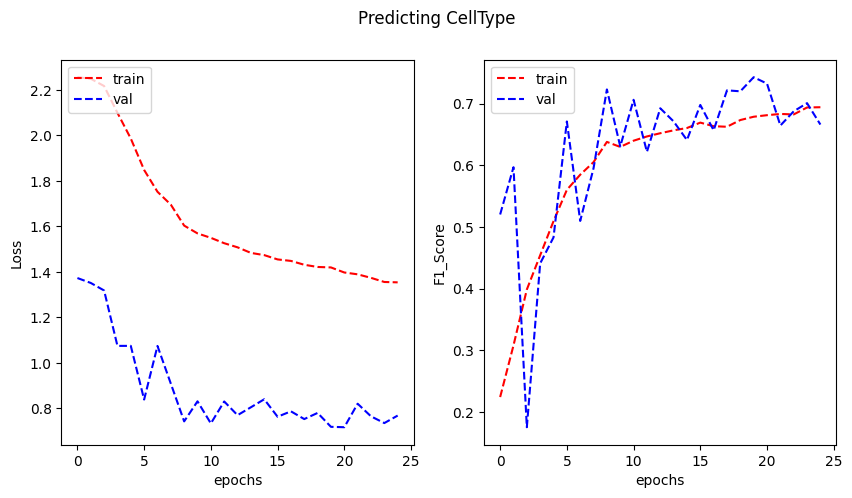

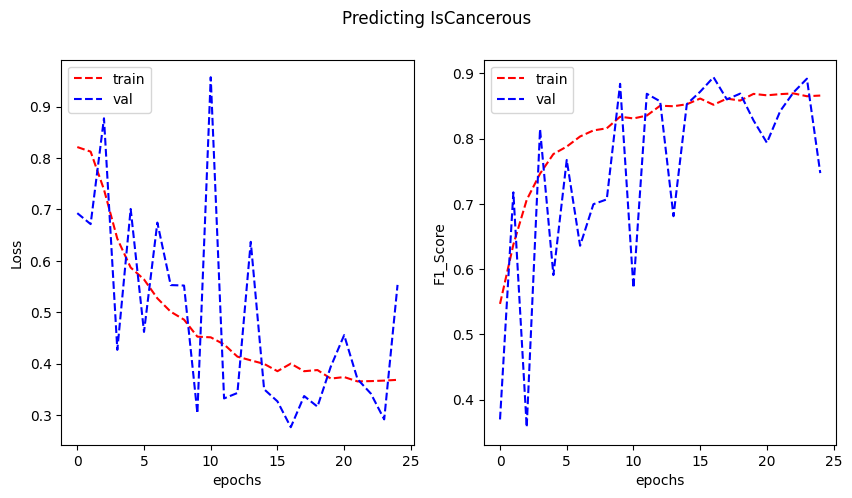

In [42]:
plot_learning_curve(history_VGG_1.history['loss'], history_VGG_1.history['val_loss'], history_VGG_1.history['f1'], history_VGG_1.history['val_f1'],
                    metric_name='F1_Score', suptitle="Predicting CellType")

plot_learning_curve(history_VGG_2.history['loss'], history_VGG_2.history['val_loss'], 
                    history_VGG_2.history['f1'], history_VGG_2.history['val_f1'], 
                    metric_name='F1_Score', suptitle="Predicting IsCancerous")

## 5. Model Optimisation
## Identifying overfitting/underfitting
- We see a large generation gap in loss cellType however f1 score is quite similar.
  - The gap in loss is explained by a more difficult training set compared to validation set.
  - The similar f1 score suggests success of our weights and augmentation to help reduce impact of the imbalanced data
  - A high f1-score suggests recall and precision are both close and high 
- On the other hand, predicting isCancerous shows a much closer loss despite harder training set.
  - But this 'harder' training set is still just images of only one cell type. Thus such performance was excepted
  - Same for the F1 score.
- As we see the problem is a need for more stable performance estimates for validation set (cross validation) 
- High variance as val performance is significantly change per epoch (but no overfitting) 
- Further training as it seems the fluntuations/zigzags reduce as epochs continue. 
- More stable and smooth learning to help reduce zigzags as each epochs learning seems to head towards good performance but is very unstable. 

## Optimisation Techniques
- Reduce model complexity by switching to leNet architecture which is better for smaller images.
  - It has fewer convolutional and fully connected layers to help train faster.
  - Also reduce overfitting by not avoiding really high-level abstractions that get too tuned to the learning overly specific patterns and reduce generalisation.
-  We will use KFold Cross-Validation to tune the a bit regularisation, try two changing learning rate and momemmtum + (dropout constant)
  - Due to computational limitation the number of epochs and the volume of the search will be small.
  - Dropout to improve robustness of other neurons by dropping fraction of neurons so each forawrd pass is through a different subnet work
    - Allowing different parts of the network to become learn the model instead of being dominanted by a few neuron (so more of the neurons' patterns is useful)
    - Helps overfitting by reducing impact of individual neurons
    - Helps generalisation by helping each neuron identify useful patterns (activations).
- Changing Learning rate (to improve smoothness/stability of learning) and momemtum for improving the gradient learning

---

In [ ]:
# Pipeline for next Improved model


def define_model(reg, output_classes):
    OUTPUT_CLASSES = output_classes
    reg_lambda = reg
    model_leNet_1 = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                            kernel_regularizer=tf.keras.regularizers.l2(reg_lambda), input_shape=(27, 27, 3)),
        # Down sampling using max pooling. Reduces size by 2.
        tf.keras.layers.MaxPooling2D((2, 2)),
        
        #LeNet block 2
        # More filters to learn more complex patterns
        # Learns patterns of the patterns in features maps of above block
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                            kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
        #LeNet block 3
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same',
                            kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        
        # Then decision maker
        # convert the ?D output tensor into a 1D Vector. if second last layer is 4x4 then (4 * 4 * 128)
        # Allows dense (fully connected) layer to make connections between activations in across many feature maps to classes?  
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(OUTPUT_CLASSES, kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    ])
    return model_leNet_1


def trainValSetsGenerator(KFolds):
    _sets = {}
    
    # get list of the keys... [0, 1, 2, 3]
    keys_list = list(KFolds.keys())

    # for each key add to the set a train_set and a val_set
    for i in keys_list:
        # Make list of keys but without current key (i).
        # example. for  i = 0: train_keys[1,2,3] val_keys[0]
        # Then add KFold[1], KFold[2], KFold[3] to trainset
        # then add KFold[0] to val_set
        train_keys = keys_list[0:i] + keys_list[i + 1:]

        train_set = pd.DataFrame(columns=data.columns)
        for j in train_keys:
            train_set = pd.concat([train_set, KFolds[j]], ignore_index=True)
        
        val_set = pd.DataFrame(columns=data.columns)
        val_set = pd.concat([val_set, KFolds[i]], ignore_index=True)


        _sets[i] = (train_set, val_set)

    return _sets



In [54]:

# https://keras.io/api/optimizers/learning_rate_schedules/exponential_decay/

lr_schedules = {
    0: tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate = 0.01, # Not too high
        decay_steps = 6000, # Number of batches? epoches? after which to change learning rate
        decay_rate=0.96, # New rate = old rate * 0.96
        staircase = False, # staircase function
    ),
    1: tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate = 0.01, # Not too high
        decay_steps = 6000, # Number of batches? epoches? after which to change learning rate
        decay_rate=0.96, # New rate = old rate * 0.96
        staircase = False, # staircase function
    )
}
reg_lambda = [1e-4, 1e-2]
momentums = [0.8, 0.9]


# We do data splitting into KFolds
KFolds, KFold_test = KFoldSplit(3, 0.8)
# Then we get train set and val set for the different folds 
sets = trainValSetsGenerator(KFolds)

# we will use a dataframe to store parameters + mean performance + variance
# We will use this to later find the best parameters
val_scores = pd.DataFrame(columns=['reg','lr','momemtum','mean_score','variance_score'])

# grid search
for reg in reg_lambda:
    for idx, lr in lr_schedules.items():
        for m in momentums:

            # initalise the optimiser with parameters 
            optimizer = tf.keras.optimizers.SGD(
                learning_rate = lr, # the a in w_new = w_old - a * gradient(L(w))
                # momemtum adds fraction of previous update vector (dir + magnitude) to current update. 
                # velocity = momentum * velocity - learning_rate * g 
                # w = w + velocity
                momentum = m,
                nesterov=True,
            )
            # define the model with correct regularisation
            model = define_model(reg, OUTPUT_CLASSES_CELLTYPE)
            model.compile(optimizer=optimizer,
                loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                metrics=[tf.keras.metrics.F1Score(name="f1", average="weighted")]
            )

            # Lets store the loss (bias?) for each fold training
            cv_loss = []
            # for each kfold set (a train set and val set) do the training and store the loss results
            for idx, s in sets.items():
                train_set = s[0]
                val_set = s[1]
                train_generator, validation_generator, _, __ = DataGenerator(train_set, val_set, 27)
                
                history_leNet = model.fit(train_generator, validation_data = validation_generator, epochs=20, verbose=1, class_weight=cell_class_weights, steps_per_epoch=100) #, steps_per_epoch=50)
                cv_loss.append(history_leNet.history['val_loss'][-1]) # last epoch val loss score

            # Now lets find the mean score
            # Now lets find the variance
            # And add it to val_scores dataframe for later sorting
            new = pd.DataFrame([[reg, lr.staircase, m, np.mean(cv_loss), np.var(cv_loss, ddof=1)]], columns=val_scores.columns)
            val_scores = pd.concat([val_scores, new], ignore_index=True)



# Need to reference CHATGPT




- For train set, picked 27 patients out of 34 patients with cancerous cells
- For train set, picked 21 patients out of 26 patients with non cancerous cells
- Therefore, there is a ratio of cancerous to total patients in train set of 0.5625 
- Therefore, there is a ratio of cancerous to total patients in test set of 0.5833333333333334 
- For fold set 0, picked 27 patients out of 27 train set patients with cancerous cells
- For fold set 0, picked 21 patients out of 21 train set patients with non cancerous cells
- Therefore, there is a ratio of cancerous to total patient in fold set 0 of 0.5625
- For fold set 1, picked 18 patients out of 27 train set patients with cancerous cells
- For fold set 1, picked 14 patients out of 21 train set patients with non cancerous cells
- Therefore, there is a ratio of cancerous to total patient in fold set 1 of 0.5625
- For fold set 2, picked 9 patients out of 27 train set patients with cancerous cells
- For fold set 2, picked 7 patients out of 21 train s

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - f1: 0.1633 - loss: 2.3564 - val_f1: 0.0139 - val_loss: 1.4481
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - f1: 0.1330 - loss: 2.2991 - val_f1: 0.1291 - val_loss: 1.4176
Epoch 3/20
  1/100 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1: 0.1404 - loss: 2.3045

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1: 0.1304 - loss: 2.2118 - val_f1: 0.1374 - val_loss: 1.4093
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - f1: 0.2492 - loss: 2.2599 - val_f1: 0.2213 - val_loss: 1.3794
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - f1: 0.3015 - loss: 2.2674 - val_f1: 0.1283 - val_loss: 1.4053
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1: 0.1778 - loss: 2.2319 - val_f1: 0.1494 - val_loss: 1.4066
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - f1: 0.2528 - loss: 2.2427 - val_f1: 0.3035 - val_loss: 1.2944
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.4000 - loss: 2.1696 - val_f1: 0.2495 - val_loss: 1.3171
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1: 0.3744 - loss: 2.2341 - val_f1: 0.2760 - val_loss: 1.3394
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.4522 - loss: 1.9820 - val_f1: 0.5038 - val_loss: 1.2505
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.4931 - loss: 1.

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - f1: 0.5424 - loss: 1.7758 - val_f1: 0.4871 - val_loss: 1.1608
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - f1: 0.6046 - loss: 1.6196 - val_f1: 0.4138 - val_loss: 1.2084
Epoch 3/20
  1/100 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1: 0.5272 - loss: 1.4795

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - f1: 0.5605 - loss: 1.5359 - val_f1: 0.4440 - val_loss: 1.1916
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.6319 - loss: 1.5932 - val_f1: 0.5661 - val_loss: 1.0213
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - f1: 0.6340 - loss: 1.5834 - val_f1: 0.5023 - val_loss: 1.1504
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1: 0.6691 - loss: 1.3814 - val_f1: 0.5479 - val_loss: 1.0048
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - f1: 0.6503 - loss: 1.5232 - val_f1: 0.5408 - val_loss: 1.0254
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.6542 - loss: 1.5274 - val_f1: 0.5180 - val_loss: 1.0954
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1: 0.6285 - loss: 1.5265 - val_f1: 0.5260 - val_loss: 1.0404
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.6466 - loss: 1.5062 - val_f1: 0.5055 - val_loss: 1.1103
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.6255 - loss: 1.

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - f1: 0.6005 - loss: 1.6628 - val_f1: 0.7056 - val_loss: 0.8457
Epoch 2/20
 92/100 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - f1: 0.6090 - loss: 1.6699

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - f1: 0.6085 - loss: 1.6684 - val_f1: 0.7176 - val_loss: 0.7297
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - f1: 0.6162 - loss: 1.6036 - val_f1: 0.6911 - val_loss: 0.6967
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.6228 - loss: 1.5513 - val_f1: 0.7087 - val_loss: 0.7456
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.6123 - loss: 1.6201 - val_f1: 0.7078 - val_loss: 0.7147
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.6531 - loss: 1.4860 - val_f1: 0.6933 - val_loss: 0.7205
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - f1: 0.6471 - loss: 1.5365 - val_f1: 0.7225 - val_loss: 0.7812
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.6509 - loss: 1.5204 - val_f1: 0.6966 - val_loss: 0.8191
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.6506 - loss: 1.5020 - val_f1: 0.7245 - val_loss: 0.7954
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - f1: 0.6574 - loss: 

/tmp/ipykernel_18175/1384446587.py:66: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  val_scores = pd.concat([val_scores, new], ignore_index=True)
/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs`

100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - f1: 0.1875 - loss: 2.3355 - val_f1: 0.0094 - val_loss: 1.4174
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - f1: 0.1085 - loss: 2.2979 - val_f1: 0.1075 - val_loss: 1.4277
Epoch 3/20
  1/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - f1: 0.0808 - loss: 2.5750

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1: 0.0807 - loss: 2.3794 - val_f1: 0.1075 - val_loss: 1.4256
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.1387 - loss: 2.3057 - val_f1: 0.1075 - val_loss: 1.4944
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - f1: 0.1249 - loss: 2.2876 - val_f1: 0.1245 - val_loss: 1.4045
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1: 0.1937 - loss: 2.2543 - val_f1: 0.2414 - val_loss: 1.4012
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - f1: 0.2745 - loss: 2.2716 - val_f1: 0.2414 - val_loss: 1.3656
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.2120 - loss: 2.3111 - val_f1: 0.1347 - val_loss: 1.4587
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1: 0.1290 - loss: 2.3303 - val_f1: 0.0094 - val_loss: 1.4436
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.1649 - loss: 2.3045 - val_f1: 0.1075 - val_loss: 1.4240
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - f1: 0.1488 - loss: 2.

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - f1: 0.1395 - loss: 2.1577 - val_f1: 0.0593 - val_loss: 1.4074
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.1411 - loss: 2.1854 - val_f1: 0.0593 - val_loss: 1.4244
Epoch 3/20
  1/100 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1: 0.0808 - loss: 2.4868

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1: 0.1157 - loss: 2.3779 - val_f1: 0.0593 - val_loss: 1.4230
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - f1: 0.1396 - loss: 2.1735 - val_f1: 0.0593 - val_loss: 1.4208
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.1376 - loss: 2.2074 - val_f1: 0.0593 - val_loss: 1.4285
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - f1: 0.1552 - loss: 2.2008 - val_f1: 0.0593 - val_loss: 1.4301
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - f1: 0.1331 - loss: 2.1876 - val_f1: 0.0593 - val_loss: 1.4383
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - f1: 0.1306 - loss: 2.1794 - val_f1: 0.0593 - val_loss: 1.4232
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - f1: 0.1656 - loss: 2.1676 - val_f1: 0.0593 - val_loss: 1.4248
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - f1: 0.1426 - loss: 2.1737 - val_f1: 0.0593 - val_loss: 1.4155
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.1537 - loss: 2.

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - f1: 0.3739 - loss: 2.1702 - val_f1: 0.2013 - val_loss: 1.3884
Epoch 2/20
 93/100 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1: 0.4092 - loss: 2.1963

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.4113 - loss: 2.1936 - val_f1: 0.5057 - val_loss: 1.1921
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - f1: 0.4853 - loss: 2.0792 - val_f1: 0.4246 - val_loss: 1.1953
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.4831 - loss: 2.0762 - val_f1: 0.4292 - val_loss: 1.2073
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - f1: 0.5241 - loss: 1.9789 - val_f1: 0.5393 - val_loss: 1.0988
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.5328 - loss: 1.9174 - val_f1: 0.5616 - val_loss: 1.0752
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.5314 - loss: 1.9090 - val_f1: 0.4830 - val_loss: 1.1017
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - f1: 0.5377 - loss: 1.9348 - val_f1: 0.5658 - val_loss: 0.9834
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.5747 - loss: 1.8298 - val_f1: 0.4698 - val_loss: 1.1070
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.5631 - loss: 

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - f1: 0.1444 - loss: 2.3298 - val_f1: 0.1075 - val_loss: 1.3998
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - f1: 0.1990 - loss: 2.2712 - val_f1: 0.1417 - val_loss: 1.4163
Epoch 3/20
  1/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - f1: 0.1089 - loss: 2.2127

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - f1: 0.2026 - loss: 2.2380 - val_f1: 0.3963 - val_loss: 1.3368
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.3056 - loss: 2.2432 - val_f1: 0.1922 - val_loss: 1.4248
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.3404 - loss: 2.2198 - val_f1: 0.0414 - val_loss: 1.5263
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1: 0.0595 - loss: 2.2300 - val_f1: 0.2035 - val_loss: 1.4232
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.3273 - loss: 2.2082 - val_f1: 0.1175 - val_loss: 1.4271
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.3289 - loss: 2.1829 - val_f1: 0.3860 - val_loss: 1.3127
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1: 0.4209 - loss: 1.9194 - val_f1: 0.3169 - val_loss: 1.3015
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.4413 - loss: 2.0340 - val_f1: 0.3945 - val_loss: 1.2230
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.4748 - loss: 1.

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - f1: 0.5434 - loss: 1.7802 - val_f1: 0.4716 - val_loss: 1.1067
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - f1: 0.6218 - loss: 1.5949 - val_f1: 0.4001 - val_loss: 1.1682
Epoch 3/20
  1/100 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1: 0.6267 - loss: 1.5556

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - f1: 0.5844 - loss: 1.6390 - val_f1: 0.4384 - val_loss: 1.1717
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - f1: 0.6142 - loss: 1.6452 - val_f1: 0.5212 - val_loss: 1.0684
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - f1: 0.5958 - loss: 1.6351 - val_f1: 0.5255 - val_loss: 1.0087
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1: 0.6461 - loss: 1.6937 - val_f1: 0.3829 - val_loss: 1.1533
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.6107 - loss: 1.5896 - val_f1: 0.3013 - val_loss: 1.2838
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - f1: 0.6073 - loss: 1.5890 - val_f1: 0.5220 - val_loss: 1.0720
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - f1: 0.6644 - loss: 1.4266 - val_f1: 0.4952 - val_loss: 1.1196
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.6158 - loss: 1.6137 - val_f1: 0.5099 - val_loss: 1.0942
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - f1: 0.6513 - loss: 1.

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - f1: 0.6071 - loss: 1.6839 - val_f1: 0.6628 - val_loss: 0.7372
Epoch 2/20
 91/100 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1: 0.6004 - loss: 1.6726

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.6010 - loss: 1.6688 - val_f1: 0.7156 - val_loss: 0.7433
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - f1: 0.6133 - loss: 1.5899 - val_f1: 0.6781 - val_loss: 0.7840
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.6272 - loss: 1.6042 - val_f1: 0.6909 - val_loss: 0.7483
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - f1: 0.6346 - loss: 1.6172 - val_f1: 0.6554 - val_loss: 0.7610
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.6283 - loss: 1.5567 - val_f1: 0.6410 - val_loss: 0.7620
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - f1: 0.6216 - loss: 1.5783 - val_f1: 0.6597 - val_loss: 0.7660
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.6293 - loss: 1.6110 - val_f1: 0.6762 - val_loss: 0.7501
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - f1: 0.6325 - loss: 1.5936 - val_f1: 0.7052 - val_loss: 0.7591
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.6497 - loss: 

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - f1: 0.1597 - loss: 2.3179 - val_f1: 0.0094 - val_loss: 1.4224
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - f1: 0.1176 - loss: 2.3173 - val_f1: 0.0829 - val_loss: 1.3928
Epoch 3/20
  3/100 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - f1: 0.2169 - loss: 2.2489

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - f1: 0.2253 - loss: 2.2310 - val_f1: 0.4132 - val_loss: 1.3411
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - f1: 0.3492 - loss: 2.2162 - val_f1: 0.2921 - val_loss: 1.2542
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.4313 - loss: 2.0875 - val_f1: 0.5520 - val_loss: 1.1982
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1: 0.3713 - loss: 2.1180 - val_f1: 0.4791 - val_loss: 1.2300
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - f1: 0.4503 - loss: 2.0363 - val_f1: 0.5640 - val_loss: 1.1868
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - f1: 0.5087 - loss: 1.9860 - val_f1: 0.6193 - val_loss: 1.0113
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1: 0.6219 - loss: 1.8992 - val_f1: 0.5545 - val_loss: 1.1751
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - f1: 0.5350 - loss: 1.9466 - val_f1: 0.4141 - val_loss: 1.2897
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.5023 - loss: 2.

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - f1: 0.6177 - loss: 1.6696 - val_f1: 0.5585 - val_loss: 0.9972
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.6189 - loss: 1.6317 - val_f1: 0.5943 - val_loss: 0.9497
Epoch 3/20
  1/100 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1: 0.7314 - loss: 1.2067

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1: 0.6842 - loss: 1.4704 - val_f1: 0.5835 - val_loss: 0.9394
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.6503 - loss: 1.5542 - val_f1: 0.5691 - val_loss: 0.9718
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.6358 - loss: 1.6002 - val_f1: 0.5157 - val_loss: 1.0694
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1: 0.6249 - loss: 1.6179 - val_f1: 0.5029 - val_loss: 1.0845
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.6718 - loss: 1.5023 - val_f1: 0.6275 - val_loss: 0.8781
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.6326 - loss: 1.6375 - val_f1: 0.5569 - val_loss: 0.9371
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1: 0.5840 - loss: 1.7913 - val_f1: 0.5049 - val_loss: 1.1209
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.6442 - loss: 1.5347 - val_f1: 0.5139 - val_loss: 1.1801
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.6509 - loss: 1.

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - f1: 0.5898 - loss: 1.7295 - val_f1: 0.7259 - val_loss: 0.7839
Epoch 2/20
 94/100 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1: 0.6213 - loss: 1.6436

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - f1: 0.6208 - loss: 1.6454 - val_f1: 0.6959 - val_loss: 0.8066
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.5962 - loss: 1.7156 - val_f1: 0.6710 - val_loss: 0.8597
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - f1: 0.6284 - loss: 1.5958 - val_f1: 0.7255 - val_loss: 0.7753
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.6262 - loss: 1.6052 - val_f1: 0.6513 - val_loss: 1.0252
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - f1: 0.6154 - loss: 1.6294 - val_f1: 0.6130 - val_loss: 0.8730
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.6322 - loss: 1.6092 - val_f1: 0.6959 - val_loss: 0.7964
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.6404 - loss: 1.5950 - val_f1: 0.6988 - val_loss: 0.8659
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.6399 - loss: 1.5421 - val_f1: 0.6675 - val_loss: 0.8553
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.6544 - loss: 

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - f1: 0.1721 - loss: 3.1246 - val_f1: 0.0093 - val_loss: 2.1396
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - f1: 0.1570 - loss: 2.9839 - val_f1: 0.2989 - val_loss: 1.9936
Epoch 3/20
  1/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - f1: 0.2516 - loss: 2.8421

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1: 0.3115 - loss: 2.9715 - val_f1: 0.1522 - val_loss: 1.9957
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - f1: 0.3254 - loss: 2.7966 - val_f1: 0.3202 - val_loss: 1.8239
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.3306 - loss: 2.7418 - val_f1: 0.3746 - val_loss: 1.6753
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - f1: 0.4127 - loss: 2.5697 - val_f1: 0.0903 - val_loss: 1.9588
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.3334 - loss: 2.6284 - val_f1: 0.3245 - val_loss: 1.6465
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.2791 - loss: 2.5797 - val_f1: 0.4150 - val_loss: 1.5965
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1: 0.3522 - loss: 2.4089 - val_f1: 0.3854 - val_loss: 1.5954
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.3545 - loss: 2.4637 - val_f1: 0.1075 - val_loss: 1.6724
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.1302 - loss: 2.

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - f1: 0.2979 - loss: 2.1924 - val_f1: 0.0593 - val_loss: 1.4904
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.2113 - loss: 2.2677 - val_f1: 0.2537 - val_loss: 1.3735
Epoch 3/20
  1/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - f1: 0.4538 - loss: 2.1091

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1: 0.3926 - loss: 2.2086 - val_f1: 0.1808 - val_loss: 1.4437
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.3688 - loss: 2.1420 - val_f1: 0.2859 - val_loss: 1.3365
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.3951 - loss: 2.0626 - val_f1: 0.0593 - val_loss: 1.4790
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1: 0.0815 - loss: 2.1369 - val_f1: 0.0593 - val_loss: 1.4781
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.1399 - loss: 2.2284 - val_f1: 0.0593 - val_loss: 1.4559
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.2313 - loss: 2.1625 - val_f1: 0.1558 - val_loss: 1.4637
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1: 0.3852 - loss: 2.3792 - val_f1: 0.1121 - val_loss: 1.6218
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.2365 - loss: 2.1797 - val_f1: 0.2396 - val_loss: 1.4606
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.3227 - loss: 2.

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - f1: 0.1377 - loss: 2.3247 - val_f1: 0.1683 - val_loss: 1.4178
Epoch 2/20
 91/100 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1: 0.2412 - loss: 2.2795

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - f1: 0.2352 - loss: 2.2791 - val_f1: 0.0276 - val_loss: 1.4243
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.1377 - loss: 2.2790 - val_f1: 0.0276 - val_loss: 1.4355
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.1013 - loss: 2.2702 - val_f1: 0.0358 - val_loss: 1.4149
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.2710 - loss: 2.2445 - val_f1: 0.0382 - val_loss: 1.4923
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - f1: 0.3160 - loss: 2.1848 - val_f1: 0.0276 - val_loss: 1.5121
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - f1: 0.1142 - loss: 2.2914 - val_f1: 0.0276 - val_loss: 1.4401
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - f1: 0.1444 - loss: 2.2345 - val_f1: 0.0305 - val_loss: 1.4645
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - f1: 0.1154 - loss: 2.3077 - val_f1: 0.3251 - val_loss: 1.2676
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - f1: 0.3022 - loss: 

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - f1: 0.1839 - loss: 3.0978 - val_f1: 0.1075 - val_loss: 2.0212
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - f1: 0.0966 - loss: 2.8133 - val_f1: 0.0094 - val_loss: 1.8868
Epoch 3/20
  1/100 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1: 0.0949 - loss: 2.6988

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1: 0.0845 - loss: 2.6431 - val_f1: 0.0094 - val_loss: 1.8615
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.1078 - loss: 2.6505 - val_f1: 0.0094 - val_loss: 1.7369
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.0773 - loss: 2.5610 - val_f1: 0.3163 - val_loss: 1.5487
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1: 0.3450 - loss: 2.3865 - val_f1: 0.2268 - val_loss: 1.5640
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.2631 - loss: 2.4689 - val_f1: 0.1075 - val_loss: 1.5199
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.1237 - loss: 2.3963 - val_f1: 0.1075 - val_loss: 1.5080
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1: 0.0819 - loss: 2.3393 - val_f1: 0.1075 - val_loss: 1.5084
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.1362 - loss: 2.4171 - val_f1: 0.0094 - val_loss: 1.5098
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.0709 - loss: 2.

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - f1: 0.1495 - loss: 2.1973 - val_f1: 0.0593 - val_loss: 1.4165
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.1272 - loss: 2.1944 - val_f1: 0.0593 - val_loss: 1.4181
Epoch 3/20
  1/100 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1: 0.2002 - loss: 2.0431

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1: 0.1462 - loss: 2.0709 - val_f1: 0.0593 - val_loss: 1.4184
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.1306 - loss: 2.1934 - val_f1: 0.0593 - val_loss: 1.4161
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.1429 - loss: 2.1255 - val_f1: 0.0593 - val_loss: 1.4090
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1: 0.1254 - loss: 2.0468 - val_f1: 0.0593 - val_loss: 1.4095
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - f1: 0.1334 - loss: 2.1552 - val_f1: 0.0593 - val_loss: 1.4033
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.1365 - loss: 2.1384 - val_f1: 0.0593 - val_loss: 1.4200
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1: 0.1251 - loss: 2.2120 - val_f1: 0.0593 - val_loss: 1.4232
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - f1: 0.1461 - loss: 2.1869 - val_f1: 0.0593 - val_loss: 1.3954
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - f1: 0.1320 - loss: 2.

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - f1: 0.1302 - loss: 2.3014 - val_f1: 0.0276 - val_loss: 1.3847
Epoch 2/20
 94/100 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1: 0.1075 - loss: 2.2754

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.1072 - loss: 2.2742 - val_f1: 0.0276 - val_loss: 1.3977
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - f1: 0.1051 - loss: 2.2828 - val_f1: 0.0276 - val_loss: 1.4092
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.1091 - loss: 2.2284 - val_f1: 0.0276 - val_loss: 1.3914
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - f1: 0.1096 - loss: 2.2468 - val_f1: 0.0276 - val_loss: 1.4048
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.1420 - loss: 2.2686 - val_f1: 0.0276 - val_loss: 1.4061
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - f1: 0.0975 - loss: 2.2112 - val_f1: 0.0276 - val_loss: 1.3902
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.1160 - loss: 2.2928 - val_f1: 0.0276 - val_loss: 1.3902
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - f1: 0.1179 - loss: 2.2871 - val_f1: 0.1683 - val_loss: 1.3752
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.1436 - loss: 

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - f1: 0.1482 - loss: 3.1515 - val_f1: 0.1012 - val_loss: 2.1103
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - f1: 0.2613 - loss: 2.9492 - val_f1: 0.2414 - val_loss: 1.9593
Epoch 3/20
  1/100 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1: 0.2553 - loss: 2.9788

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - f1: 0.2818 - loss: 2.9704 - val_f1: 0.2414 - val_loss: 1.9826
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - f1: 0.1506 - loss: 2.8702 - val_f1: 0.1066 - val_loss: 1.8624
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - f1: 0.2559 - loss: 2.7213 - val_f1: 0.3524 - val_loss: 1.7054
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - f1: 0.5419 - loss: 2.4672 - val_f1: 0.2896 - val_loss: 1.7224
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.3756 - loss: 2.6186 - val_f1: 0.4423 - val_loss: 1.6082
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.4319 - loss: 2.4359 - val_f1: 0.4721 - val_loss: 1.5082
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1: 0.4658 - loss: 2.3696 - val_f1: 0.4330 - val_loss: 1.6380
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.4365 - loss: 2.3541 - val_f1: 0.4919 - val_loss: 1.4472
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.4427 - loss: 2.

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - f1: 0.5732 - loss: 1.9715 - val_f1: 0.5211 - val_loss: 1.2370
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - f1: 0.5728 - loss: 1.9479 - val_f1: 0.3687 - val_loss: 1.4888
Epoch 3/20
  1/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - f1: 0.4671 - loss: 1.7830

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1: 0.5885 - loss: 1.7833 - val_f1: 0.4865 - val_loss: 1.2505
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.5784 - loss: 1.9374 - val_f1: 0.4628 - val_loss: 1.1968
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.5917 - loss: 1.8828 - val_f1: 0.5052 - val_loss: 1.2019
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1: 0.5199 - loss: 2.0513 - val_f1: 0.4544 - val_loss: 1.3524
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.5954 - loss: 1.8414 - val_f1: 0.4936 - val_loss: 1.1660
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.5997 - loss: 1.8359 - val_f1: 0.3850 - val_loss: 1.3522
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1: 0.5879 - loss: 1.8021 - val_f1: 0.5106 - val_loss: 1.1717
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.6301 - loss: 1.7408 - val_f1: 0.3614 - val_loss: 1.5539
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - f1: 0.5942 - loss: 1.

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - f1: 0.5331 - loss: 2.0277 - val_f1: 0.6718 - val_loss: 0.9291
Epoch 2/20
 91/100 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1: 0.5509 - loss: 1.9482

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - f1: 0.5511 - loss: 1.9489 - val_f1: 0.6610 - val_loss: 0.9667
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - f1: 0.5574 - loss: 1.9246 - val_f1: 0.6669 - val_loss: 0.9861
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - f1: 0.5727 - loss: 1.8545 - val_f1: 0.6599 - val_loss: 0.9885
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.5719 - loss: 1.8945 - val_f1: 0.6717 - val_loss: 1.0516
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - f1: 0.4948 - loss: 2.0546 - val_f1: 0.6337 - val_loss: 1.0930
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.5516 - loss: 1.9314 - val_f1: 0.6595 - val_loss: 1.0497
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - f1: 0.5587 - loss: 1.9255 - val_f1: 0.6241 - val_loss: 1.0300
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.5297 - loss: 1.9770 - val_f1: 0.6564 - val_loss: 1.0418
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - f1: 0.5720 - loss: 

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - f1: 0.1470 - loss: 3.1249 - val_f1: 0.0094 - val_loss: 2.0368
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - f1: 0.1327 - loss: 2.8866 - val_f1: 0.0094 - val_loss: 1.8331
Epoch 3/20
  1/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - f1: 0.0382 - loss: 2.4731

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1: 0.0382 - loss: 2.5633 - val_f1: 0.0094 - val_loss: 1.8264
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.0832 - loss: 2.6641 - val_f1: 0.1075 - val_loss: 1.7005
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.1157 - loss: 2.5379 - val_f1: 0.1075 - val_loss: 1.5952
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1: 0.1939 - loss: 2.5479 - val_f1: 0.1075 - val_loss: 1.5937
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.1340 - loss: 2.4199 - val_f1: 0.0094 - val_loss: 1.5498
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.1140 - loss: 2.3976 - val_f1: 0.1075 - val_loss: 1.4983
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1: 0.1159 - loss: 2.3415 - val_f1: 0.1075 - val_loss: 1.5026
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.1879 - loss: 2.3351 - val_f1: 0.3966 - val_loss: 1.3815
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.2676 - loss: 2.

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - f1: 0.1334 - loss: 2.2027 - val_f1: 0.0593 - val_loss: 1.4251
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - f1: 0.1529 - loss: 2.2062 - val_f1: 0.0593 - val_loss: 1.4126
Epoch 3/20
  1/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - f1: 0.1667 - loss: 2.0833

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1: 0.1774 - loss: 2.2654 - val_f1: 0.0593 - val_loss: 1.4128
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.1394 - loss: 2.1883 - val_f1: 0.0593 - val_loss: 1.4133
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.1507 - loss: 2.1761 - val_f1: 0.0593 - val_loss: 1.4060
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1: 0.1266 - loss: 2.0321 - val_f1: 0.0593 - val_loss: 1.4063
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.1370 - loss: 2.1794 - val_f1: 0.0593 - val_loss: 1.4282
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.1512 - loss: 2.1192 - val_f1: 0.0593 - val_loss: 1.4269
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1: 0.1883 - loss: 2.4716 - val_f1: 0.0593 - val_loss: 1.4289
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.1355 - loss: 2.2104 - val_f1: 0.0593 - val_loss: 1.4316
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.1275 - loss: 2.

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - f1: 0.1240 - loss: 2.2410 - val_f1: 0.0276 - val_loss: 1.4277
Epoch 2/20
 94/100 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1: 0.0978 - loss: 2.2527

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.0978 - loss: 2.2527 - val_f1: 0.0276 - val_loss: 1.3946
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - f1: 0.1091 - loss: 2.2462 - val_f1: 0.0276 - val_loss: 1.3848
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.1062 - loss: 2.2035 - val_f1: 0.0276 - val_loss: 1.3960
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - f1: 0.1061 - loss: 2.2464 - val_f1: 0.0276 - val_loss: 1.3884
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.1238 - loss: 2.2335 - val_f1: 0.1683 - val_loss: 1.3777
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - f1: 0.1242 - loss: 2.2328 - val_f1: 0.0276 - val_loss: 1.3961
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - f1: 0.0992 - loss: 2.2311 - val_f1: 0.0276 - val_loss: 1.4079
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - f1: 0.1144 - loss: 2.2463 - val_f1: 0.0276 - val_loss: 1.3930
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.1060 - loss: 

In [76]:
best_performing_hyperparams_cellType = val_scores.sort_values(by=['variance_score', 'mean_score'], ascending=[True, True]).iloc[0]
with open(f"params/cellType.params", "w") as file:
    json.dump(best_performing_hyperparams_cellType.to_json(orient='columns'), file)

In [77]:

reg_lambda = [1e-4, 1e-2]
momentums = [0.8, 0.9]


# We do data splitting into KFolds
KFolds, KFold_test = KFoldSplit(3, 0.8)
# Then we get train set and val set for the different folds 
sets = trainValSetsGenerator(KFolds)

# we will use a dataframe to store parameters + mean performance + variance
# We will use this to later find the best parameters
val_scores_isCancerous = pd.DataFrame(columns=['reg','lr','momemtum','mean_score','variance_score'])

# grid search
for reg in reg_lambda:
    for idx, lr in lr_schedules.items():
        for m in momentums:

            # initalise the optimiser with parameters 
            optimizer = tf.keras.optimizers.SGD(
                learning_rate = lr, # the a in w_new = w_old - a * gradient(L(w))
                # momemtum adds fraction of previous update vector (dir + magnitude) to current update. 
                # velocity = momentum * velocity - learning_rate * g 
                # w = w + velocity
                momentum = m,
                nesterov=True,
            )
            # define the model with correct regularisation
            model = define_model(reg, OUTPUT_CLASSES_ISCANCEROUS)
            model.compile(optimizer=optimizer,
                loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                metrics=[tf.keras.metrics.F1Score(name="f1", average="weighted")]
            )

            # Lets store the loss (bias?) for each fold training
            cv_loss = []
            # for each kfold set (a train set and val set) do the training and store the loss results
            for idx, s in sets.items():
                train_set = s[0]
                val_set = s[1]
                _, __, train_generator, validation_generator = DataGenerator(train_set, val_set, 27)
                
                history_leNet = model.fit(train_generator, validation_data = validation_generator, epochs=20, verbose=1, class_weight=isCancerous_class_weights, steps_per_epoch=100) #, steps_per_epoch=50)
                cv_loss.append(history_leNet.history['val_loss'][-1]) # last epoch val loss score

            # Now lets find the mean score
            # Now lets find the variance
            # And add it to val_scores dataframe for later sorting
            new = pd.DataFrame([[reg, lr, m, np.mean(cv_loss), np.var(cv_loss, ddof=1)]], columns=val_scores.columns)
            val_scores_isCancerous = pd.concat([val_scores_isCancerous, new], ignore_index=True)


# we will sort by performance 
# then we will first sort by variance (since we want most stable parameters among best performers)


- For train set, picked 27 patients out of 34 patients with cancerous cells
- For train set, picked 21 patients out of 26 patients with non cancerous cells
- Therefore, there is a ratio of cancerous to total patients in train set of 0.5625 
- Therefore, there is a ratio of cancerous to total patients in test set of 0.5833333333333334 
- For fold set 0, picked 27 patients out of 27 train set patients with cancerous cells
- For fold set 0, picked 21 patients out of 21 train set patients with non cancerous cells
- Therefore, there is a ratio of cancerous to total patient in fold set 0 of 0.5625
- For fold set 1, picked 18 patients out of 27 train set patients with cancerous cells
- For fold set 1, picked 14 patients out of 21 train set patients with non cancerous cells
- Therefore, there is a ratio of cancerous to total patient in fold set 1 of 0.5625
- For fold set 2, picked 9 patients out of 27 train set patients with cancerous cells
- For fold set 2, picked 7 patients out of 21 train s

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - f1: 0.5338 - loss: 0.8258 - val_f1: 0.4432 - val_loss: 0.6701
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - f1: 0.5902 - loss: 0.8130 - val_f1: 0.7354 - val_loss: 0.6696
Epoch 3/20
  1/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - f1: 0.6040 - loss: 0.7961

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - f1: 0.6338 - loss: 0.7937 - val_f1: 0.5880 - val_loss: 0.6564
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - f1: 0.6466 - loss: 0.7822 - val_f1: 0.7610 - val_loss: 0.5873
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - f1: 0.6699 - loss: 0.7435 - val_f1: 0.6739 - val_loss: 0.5541
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - f1: 0.7119 - loss: 0.7474 - val_f1: 0.6592 - val_loss: 0.6227
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - f1: 0.7059 - loss: 0.7125 - val_f1: 0.7946 - val_loss: 0.5091
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.7243 - loss: 0.7004 - val_f1: 0.5196 - val_loss: 0.7060
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1: 0.7314 - loss: 0.6602 - val_f1: 0.7089 - val_loss: 0.5298
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.7374 - loss: 0.6784 - val_f1: 0.8242 - val_loss: 0.4703
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.7612 - loss: 0.

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - f1: 0.7846 - loss: 0.6110 - val_f1: 0.7840 - val_loss: 0.5353
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - f1: 0.7812 - loss: 0.6024 - val_f1: 0.7469 - val_loss: 0.4780
Epoch 3/20
  1/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - f1: 0.8497 - loss: 0.5748

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1: 0.7693 - loss: 0.5910 - val_f1: 0.8571 - val_loss: 0.4272
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - f1: 0.7918 - loss: 0.5809 - val_f1: 0.8674 - val_loss: 0.3651
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.7848 - loss: 0.5993 - val_f1: 0.8493 - val_loss: 0.4862
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1: 0.8175 - loss: 0.6421 - val_f1: 0.8588 - val_loss: 0.4274
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.7717 - loss: 0.6251 - val_f1: 0.8512 - val_loss: 0.4158
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.7860 - loss: 0.5740 - val_f1: 0.6897 - val_loss: 0.4793
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1: 0.8014 - loss: 0.6027 - val_f1: 0.8602 - val_loss: 0.4437
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.7685 - loss: 0.5996 - val_f1: 0.8555 - val_loss: 0.3922
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.8080 - loss: 0.

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - f1: 0.8154 - loss: 0.5080 - val_f1: 0.8538 - val_loss: 0.3505
Epoch 2/20
 91/100 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1: 0.8176 - loss: 0.4910

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.8181 - loss: 0.4908 - val_f1: 0.8745 - val_loss: 0.3057
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.7911 - loss: 0.5394 - val_f1: 0.8877 - val_loss: 0.3030
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - f1: 0.8251 - loss: 0.4764 - val_f1: 0.8902 - val_loss: 0.2855
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.8255 - loss: 0.5089 - val_f1: 0.8820 - val_loss: 0.3052
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - f1: 0.8105 - loss: 0.5285 - val_f1: 0.8258 - val_loss: 0.3766
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.8528 - loss: 0.4476 - val_f1: 0.8920 - val_loss: 0.2895
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.8208 - loss: 0.4667 - val_f1: 0.8919 - val_loss: 0.2959
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.8390 - loss: 0.4619 - val_f1: 0.8862 - val_loss: 0.3047
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.8546 - loss: 

/tmp/ipykernel_18175/3169874832.py:50: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  val_scores_isCancerous = pd.concat([val_scores_isCancerous, new], ignore_index=True)
/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its

100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - f1: 0.5180 - loss: 0.8247 - val_f1: 0.7019 - val_loss: 0.6694
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.6365 - loss: 0.7823 - val_f1: 0.7844 - val_loss: 0.5481
Epoch 3/20
  3/100 ━━━━━━━━━━━━━━━━━━━━ 1:11 733ms/step - f1: 0.7204 - loss: 0.6214

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.6914 - loss: 0.6675 - val_f1: 0.2584 - val_loss: 0.9658
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.6969 - loss: 0.7307 - val_f1: 0.7416 - val_loss: 0.4917
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.7334 - loss: 0.6905 - val_f1: 0.7068 - val_loss: 0.5186
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1: 0.7238 - loss: 0.6998 - val_f1: 0.8436 - val_loss: 0.5340
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.7564 - loss: 0.6610 - val_f1: 0.8256 - val_loss: 0.5403
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.7642 - loss: 0.6462 - val_f1: 0.7632 - val_loss: 0.4758
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1: 0.7725 - loss: 0.5625 - val_f1: 0.7933 - val_loss: 0.5292
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.7376 - loss: 0.6838 - val_f1: 0.8461 - val_loss: 0.4489
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.7686 - loss: 0

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - f1: 0.8048 - loss: 0.5745 - val_f1: 0.8096 - val_loss: 0.4291
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - f1: 0.8109 - loss: 0.5388 - val_f1: 0.7972 - val_loss: 0.4591
Epoch 3/20
  1/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - f1: 0.8519 - loss: 0.5350

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1: 0.8638 - loss: 0.4269 - val_f1: 0.8484 - val_loss: 0.4024
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.8311 - loss: 0.4886 - val_f1: 0.8543 - val_loss: 0.3969
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.8466 - loss: 0.4462 - val_f1: 0.8383 - val_loss: 0.3780
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1: 0.8247 - loss: 0.5135 - val_f1: 0.8050 - val_loss: 0.4750
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.8568 - loss: 0.4296 - val_f1: 0.8414 - val_loss: 0.4004
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.8475 - loss: 0.4560 - val_f1: 0.8451 - val_loss: 0.4021
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - f1: 0.7763 - loss: 0.5455 - val_f1: 0.8042 - val_loss: 0.4301
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.8523 - loss: 0.4538 - val_f1: 0.7893 - val_loss: 0.5306
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - f1: 0.8467 - loss: 0.

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - f1: 0.8351 - loss: 0.4773 - val_f1: 0.8971 - val_loss: 0.2643
Epoch 2/20
 91/100 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - f1: 0.8430 - loss: 0.4567

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - f1: 0.8436 - loss: 0.4562 - val_f1: 0.8983 - val_loss: 0.2835
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.8407 - loss: 0.4494 - val_f1: 0.8735 - val_loss: 0.3213
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - f1: 0.8586 - loss: 0.4302 - val_f1: 0.8807 - val_loss: 0.3038
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.8611 - loss: 0.4160 - val_f1: 0.8765 - val_loss: 0.3176
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - f1: 0.8378 - loss: 0.4665 - val_f1: 0.8772 - val_loss: 0.3008
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - f1: 0.8645 - loss: 0.4030 - val_f1: 0.8737 - val_loss: 0.3038
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.8420 - loss: 0.4146 - val_f1: 0.8957 - val_loss: 0.2690
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.8564 - loss: 0.4126 - val_f1: 0.8878 - val_loss: 0.2855
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.8606 - loss: 

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - f1: 0.5232 - loss: 0.8249 - val_f1: 0.7947 - val_loss: 0.6335
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.6717 - loss: 0.7582 - val_f1: 0.7016 - val_loss: 0.5385
Epoch 3/20
  1/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - f1: 0.6054 - loss: 0.7159

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1: 0.7153 - loss: 0.7225 - val_f1: 0.6681 - val_loss: 0.5571
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.6916 - loss: 0.7384 - val_f1: 0.4361 - val_loss: 0.6667
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.6325 - loss: 0.7819 - val_f1: 0.8048 - val_loss: 0.5523
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1: 0.7817 - loss: 0.6166 - val_f1: 0.8358 - val_loss: 0.5083
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.7351 - loss: 0.6945 - val_f1: 0.7966 - val_loss: 0.5385
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.7346 - loss: 0.6820 - val_f1: 0.7468 - val_loss: 0.4818
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1: 0.7261 - loss: 0.7418 - val_f1: 0.6016 - val_loss: 0.6448
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - f1: 0.7661 - loss: 0.6294 - val_f1: 0.8296 - val_loss: 0.4425
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.7708 - loss: 0.

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - f1: 0.7971 - loss: 0.5887 - val_f1: 0.8708 - val_loss: 0.3852
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.8002 - loss: 0.5535 - val_f1: 0.8326 - val_loss: 0.3691
Epoch 3/20
  1/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - f1: 0.8465 - loss: 0.4339

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1: 0.8533 - loss: 0.4139 - val_f1: 0.8034 - val_loss: 0.4025
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.8208 - loss: 0.5204 - val_f1: 0.8345 - val_loss: 0.3722
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.7880 - loss: 0.5578 - val_f1: 0.8722 - val_loss: 0.3538
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1: 0.8153 - loss: 0.5134 - val_f1: 0.8542 - val_loss: 0.3508
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.8242 - loss: 0.5107 - val_f1: 0.8593 - val_loss: 0.3690
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.8187 - loss: 0.5414 - val_f1: 0.7674 - val_loss: 0.5212
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1: 0.8035 - loss: 0.4523 - val_f1: 0.7972 - val_loss: 0.4737
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.8399 - loss: 0.4817 - val_f1: 0.8353 - val_loss: 0.3825
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.8343 - loss: 0.

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - f1: 0.8680 - loss: 0.4282 - val_f1: 0.8479 - val_loss: 0.3446
Epoch 2/20
 91/100 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - f1: 0.8312 - loss: 0.4720

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - f1: 0.8300 - loss: 0.4742 - val_f1: 0.8997 - val_loss: 0.2917
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.8178 - loss: 0.4882 - val_f1: 0.7293 - val_loss: 0.5273
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - f1: 0.8243 - loss: 0.4645 - val_f1: 0.8856 - val_loss: 0.2871
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - f1: 0.8255 - loss: 0.4562 - val_f1: 0.8966 - val_loss: 0.2725
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - f1: 0.8494 - loss: 0.4183 - val_f1: 0.8434 - val_loss: 0.3600
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.8517 - loss: 0.4306 - val_f1: 0.8851 - val_loss: 0.3071
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - f1: 0.8496 - loss: 0.4277 - val_f1: 0.8651 - val_loss: 0.3295
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.8401 - loss: 0.4496 - val_f1: 0.8227 - val_loss: 0.3886
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - f1: 0.8464 - loss: 

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - f1: 0.5385 - loss: 0.8281 - val_f1: 0.5974 - val_loss: 0.6937
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - f1: 0.6060 - loss: 0.8064 - val_f1: 0.4343 - val_loss: 0.6784
Epoch 3/20
  1/100 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1: 0.3120 - loss: 0.9655

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1: 0.3679 - loss: 0.9064 - val_f1: 0.4436 - val_loss: 0.6868
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - f1: 0.6001 - loss: 0.8025 - val_f1: 0.7602 - val_loss: 0.5754
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.6397 - loss: 0.7721 - val_f1: 0.4830 - val_loss: 0.8703
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1: 0.5884 - loss: 1.0130 - val_f1: 0.6328 - val_loss: 0.5687
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.6923 - loss: 0.7436 - val_f1: 0.7567 - val_loss: 0.5210
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.7275 - loss: 0.6906 - val_f1: 0.7666 - val_loss: 0.4906
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1: 0.8133 - loss: 0.6096 - val_f1: 0.7828 - val_loss: 0.5387
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - f1: 0.7456 - loss: 0.6649 - val_f1: 0.8474 - val_loss: 0.4245
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.7641 - loss: 0.

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - f1: 0.8075 - loss: 0.5382 - val_f1: 0.7247 - val_loss: 0.4984
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - f1: 0.8209 - loss: 0.5357 - val_f1: 0.8444 - val_loss: 0.4519
Epoch 3/20
  1/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - f1: 0.6337 - loss: 0.7488

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1: 0.6849 - loss: 0.7327 - val_f1: 0.7829 - val_loss: 0.4647
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.8100 - loss: 0.5550 - val_f1: 0.8604 - val_loss: 0.3864
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.8231 - loss: 0.5055 - val_f1: 0.8389 - val_loss: 0.3690
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1: 0.8024 - loss: 0.4773 - val_f1: 0.8559 - val_loss: 0.3567
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.8248 - loss: 0.4986 - val_f1: 0.8516 - val_loss: 0.3679
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.8249 - loss: 0.4898 - val_f1: 0.8461 - val_loss: 0.3544
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1: 0.8660 - loss: 0.4071 - val_f1: 0.7745 - val_loss: 0.4714
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.8500 - loss: 0.4498 - val_f1: 0.8304 - val_loss: 0.3801
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.8554 - loss: 0.

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - f1: 0.8601 - loss: 0.4168 - val_f1: 0.8972 - val_loss: 0.2649
Epoch 2/20
 92/100 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - f1: 0.8319 - loss: 0.4626

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - f1: 0.8332 - loss: 0.4609 - val_f1: 0.8883 - val_loss: 0.2895
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.8462 - loss: 0.4219 - val_f1: 0.8939 - val_loss: 0.2873
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - f1: 0.8596 - loss: 0.4190 - val_f1: 0.8862 - val_loss: 0.3040
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - f1: 0.8467 - loss: 0.4337 - val_f1: 0.8882 - val_loss: 0.2799
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - f1: 0.8599 - loss: 0.4143 - val_f1: 0.8895 - val_loss: 0.2867
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.8556 - loss: 0.4365 - val_f1: 0.8580 - val_loss: 0.3249
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.8624 - loss: 0.4155 - val_f1: 0.8962 - val_loss: 0.2709
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.8737 - loss: 0.3822 - val_f1: 0.8937 - val_loss: 0.2856
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.8557 - loss: 

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - f1: 0.5534 - loss: 1.6201 - val_f1: 0.5687 - val_loss: 1.3905
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.5441 - loss: 1.4835 - val_f1: 0.4458 - val_loss: 1.2168
Epoch 3/20
  1/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - f1: 0.6601 - loss: 1.3152

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1: 0.6443 - loss: 1.3385 - val_f1: 0.5763 - val_loss: 1.2069
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.6041 - loss: 1.3304 - val_f1: 0.5750 - val_loss: 1.0613
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.6891 - loss: 1.1813 - val_f1: 0.6316 - val_loss: 0.9683
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1: 0.6165 - loss: 1.1647 - val_f1: 0.6881 - val_loss: 0.9437
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.6687 - loss: 1.1296 - val_f1: 0.7459 - val_loss: 0.8634
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.6960 - loss: 1.0383 - val_f1: 0.6828 - val_loss: 0.8370
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1: 0.6118 - loss: 1.0526 - val_f1: 0.6360 - val_loss: 0.8627
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.7110 - loss: 0.9677 - val_f1: 0.8104 - val_loss: 0.7074
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.7167 - loss: 0.

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - f1: 0.7641 - loss: 0.7370 - val_f1: 0.7611 - val_loss: 0.6184
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.7836 - loss: 0.7026 - val_f1: 0.7823 - val_loss: 0.5817
Epoch 3/20
  1/100 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1: 0.6854 - loss: 0.6947

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1: 0.5977 - loss: 0.8603 - val_f1: 0.8028 - val_loss: 0.5222
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.7686 - loss: 0.7106 - val_f1: 0.8519 - val_loss: 0.5143
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.7496 - loss: 0.7255 - val_f1: 0.8406 - val_loss: 0.5789
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1: 0.7412 - loss: 0.7586 - val_f1: 0.8228 - val_loss: 0.5951
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - f1: 0.7442 - loss: 0.7250 - val_f1: 0.8516 - val_loss: 0.5426
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.7602 - loss: 0.6890 - val_f1: 0.6428 - val_loss: 0.6863
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1: 0.7546 - loss: 0.6903 - val_f1: 0.7801 - val_loss: 0.5186
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.7583 - loss: 0.6931 - val_f1: 0.7901 - val_loss: 0.5094
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.7611 - loss: 0.

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - f1: 0.7616 - loss: 0.7118 - val_f1: 0.5434 - val_loss: 0.7929
Epoch 2/20
 92/100 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - f1: 0.7389 - loss: 0.7109

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.7399 - loss: 0.7106 - val_f1: 0.7689 - val_loss: 0.5569
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.7706 - loss: 0.6857 - val_f1: 0.3852 - val_loss: 1.0918
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - f1: 0.6447 - loss: 0.8605 - val_f1: 0.7389 - val_loss: 0.5717
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.7520 - loss: 0.7115 - val_f1: 0.6795 - val_loss: 0.6044
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.7130 - loss: 0.7418 - val_f1: 0.4602 - val_loss: 0.7231
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.6463 - loss: 0.8288 - val_f1: 0.7624 - val_loss: 0.5575
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.7875 - loss: 0.6816 - val_f1: 0.7709 - val_loss: 0.5403
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.7568 - loss: 0.6876 - val_f1: 0.7672 - val_loss: 0.5492
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - f1: 0.7437 - loss: 

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - f1: 0.5490 - loss: 1.5939 - val_f1: 0.7765 - val_loss: 1.2384
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.5665 - loss: 1.3292 - val_f1: 0.7250 - val_loss: 0.9820
Epoch 3/20
  1/100 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1: 0.7314 - loss: 1.1307

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1: 0.6817 - loss: 1.1385 - val_f1: 0.7346 - val_loss: 0.9798
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.6609 - loss: 1.1146 - val_f1: 0.8051 - val_loss: 0.9149
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - f1: 0.6496 - loss: 1.0169 - val_f1: 0.5265 - val_loss: 0.8564
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1: 0.6895 - loss: 0.9758 - val_f1: 0.8044 - val_loss: 0.7584
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.6930 - loss: 0.9092 - val_f1: 0.7852 - val_loss: 0.6959
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.7058 - loss: 0.8402 - val_f1: 0.4378 - val_loss: 0.7744
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1: 0.4870 - loss: 0.9071 - val_f1: 0.4387 - val_loss: 0.7709
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.6031 - loss: 0.8599 - val_f1: 0.7020 - val_loss: 0.6208
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.5613 - loss: 0.

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - f1: 0.5295 - loss: 0.8335 - val_f1: 0.3200 - val_loss: 0.7132
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - f1: 0.6958 - loss: 0.7558 - val_f1: 0.6632 - val_loss: 0.6469
Epoch 3/20
  1/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - f1: 0.5438 - loss: 0.7870

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1: 0.5951 - loss: 0.7860 - val_f1: 0.5953 - val_loss: 0.6641
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.7022 - loss: 0.7533 - val_f1: 0.6466 - val_loss: 0.6784
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.6611 - loss: 0.7902 - val_f1: 0.7267 - val_loss: 0.6187
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1: 0.8393 - loss: 0.5883 - val_f1: 0.8364 - val_loss: 0.5421
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.6971 - loss: 0.7696 - val_f1: 0.8171 - val_loss: 0.5797
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.7476 - loss: 0.7127 - val_f1: 0.4271 - val_loss: 0.9743
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1: 0.7166 - loss: 0.7888 - val_f1: 0.7658 - val_loss: 0.5616
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.6565 - loss: 0.7898 - val_f1: 0.4821 - val_loss: 0.7118
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.5071 - loss: 0.

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - f1: 0.6071 - loss: 0.8368 - val_f1: 0.7892 - val_loss: 0.5828
Epoch 2/20
 94/100 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1: 0.7006 - loss: 0.7579

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - f1: 0.6960 - loss: 0.7613 - val_f1: 0.5689 - val_loss: 0.7197
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.5805 - loss: 0.8371 - val_f1: 0.7285 - val_loss: 0.5856
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - f1: 0.5737 - loss: 0.8337 - val_f1: 0.4701 - val_loss: 0.7156
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.5154 - loss: 0.8416 - val_f1: 0.5069 - val_loss: 0.7095
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - f1: 0.5228 - loss: 0.8270 - val_f1: 0.4706 - val_loss: 0.6981
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.5473 - loss: 0.8204 - val_f1: 0.4551 - val_loss: 0.6918
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - f1: 0.4879 - loss: 0.8368 - val_f1: 0.4551 - val_loss: 0.6985
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.4559 - loss: 0.8394 - val_f1: 0.2245 - val_loss: 0.7060
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - f1: 0.5097 - loss: 

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - f1: 0.5297 - loss: 1.6286 - val_f1: 0.4519 - val_loss: 1.3474
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - f1: 0.6379 - loss: 1.4527 - val_f1: 0.6149 - val_loss: 1.1905
Epoch 3/20
  1/100 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1: 0.5679 - loss: 1.3941

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1: 0.6298 - loss: 1.3422 - val_f1: 0.8043 - val_loss: 1.1726
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.6637 - loss: 1.3039 - val_f1: 0.4660 - val_loss: 1.1732
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.6894 - loss: 1.1846 - val_f1: 0.8231 - val_loss: 0.9370
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1: 0.7043 - loss: 1.1082 - val_f1: 0.7993 - val_loss: 0.9507
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.7052 - loss: 1.0688 - val_f1: 0.7900 - val_loss: 0.8365
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.7003 - loss: 1.0291 - val_f1: 0.7120 - val_loss: 0.8139
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - f1: 0.6708 - loss: 1.0094 - val_f1: 0.8297 - val_loss: 0.8115
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - f1: 0.7182 - loss: 0.9583 - val_f1: 0.7469 - val_loss: 0.7185
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - f1: 0.7038 - loss: 0.

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - f1: 0.7429 - loss: 0.7367 - val_f1: 0.8554 - val_loss: 0.5358
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - f1: 0.7418 - loss: 0.7451 - val_f1: 0.8544 - val_loss: 0.5532
Epoch 3/20
  1/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - f1: 0.8519 - loss: 0.6211

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1: 0.8288 - loss: 0.6732 - val_f1: 0.8528 - val_loss: 0.5480
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - f1: 0.7834 - loss: 0.7018 - val_f1: 0.8542 - val_loss: 0.5168
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.7648 - loss: 0.7079 - val_f1: 0.8543 - val_loss: 0.5186
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1: 0.6697 - loss: 0.8306 - val_f1: 0.8122 - val_loss: 0.5191
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.7616 - loss: 0.7184 - val_f1: 0.7459 - val_loss: 0.5818
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.7513 - loss: 0.7257 - val_f1: 0.7680 - val_loss: 0.5448
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1: 0.7883 - loss: 0.6823 - val_f1: 0.8368 - val_loss: 0.5525
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.7586 - loss: 0.6840 - val_f1: 0.8432 - val_loss: 0.5267
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.7344 - loss: 0.

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - f1: 0.7763 - loss: 0.7046 - val_f1: 0.7341 - val_loss: 0.5939
Epoch 2/20
 94/100 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1: 0.7515 - loss: 0.7020

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.7513 - loss: 0.7026 - val_f1: 0.7952 - val_loss: 0.5184
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - f1: 0.7646 - loss: 0.6889 - val_f1: 0.8169 - val_loss: 0.5162
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - f1: 0.7724 - loss: 0.6852 - val_f1: 0.7065 - val_loss: 0.5945
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.7622 - loss: 0.6869 - val_f1: 0.7679 - val_loss: 0.5322
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.7533 - loss: 0.7008 - val_f1: 0.7560 - val_loss: 0.5817
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.7564 - loss: 0.6937 - val_f1: 0.6708 - val_loss: 0.6339
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - f1: 0.7582 - loss: 0.6789 - val_f1: 0.7152 - val_loss: 0.5979
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.7457 - loss: 0.7052 - val_f1: 0.7935 - val_loss: 0.5224
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - f1: 0.7714 - loss: 

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - f1: 0.5278 - loss: 1.5989 - val_f1: 0.4343 - val_loss: 1.2391
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - f1: 0.5729 - loss: 1.3383 - val_f1: 0.4343 - val_loss: 1.0692
Epoch 3/20
  1/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - f1: 0.4865 - loss: 1.1921

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1: 0.4863 - loss: 1.1932 - val_f1: 0.4343 - val_loss: 1.0644
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - f1: 0.4736 - loss: 1.1595 - val_f1: 0.4343 - val_loss: 0.9378
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.4820 - loss: 1.0402 - val_f1: 0.2414 - val_loss: 0.8647
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - f1: 0.2353 - loss: 0.9905 - val_f1: 0.2414 - val_loss: 0.8626
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - f1: 0.4776 - loss: 0.9664 - val_f1: 0.4343 - val_loss: 0.8000
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.4743 - loss: 0.9141 - val_f1: 0.2414 - val_loss: 0.7676
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - f1: 0.3217 - loss: 0.8996 - val_f1: 0.2414 - val_loss: 0.7703
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - f1: 0.3926 - loss: 0.8844 - val_f1: 0.4343 - val_loss: 0.7375
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.4667 - loss: 0.

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - f1: 0.4816 - loss: 0.8287 - val_f1: 0.2035 - val_loss: 0.6980
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - f1: 0.4610 - loss: 0.8229 - val_f1: 0.4821 - val_loss: 0.6916
Epoch 3/20
  1/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - f1: 0.4865 - loss: 0.8104

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - f1: 0.5646 - loss: 0.7886 - val_f1: 0.4821 - val_loss: 0.6885
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - f1: 0.4715 - loss: 0.8278 - val_f1: 0.4821 - val_loss: 0.6934
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - f1: 0.4959 - loss: 0.8241 - val_f1: 0.2035 - val_loss: 0.7022
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - f1: 0.1673 - loss: 0.8057 - val_f1: 0.2035 - val_loss: 0.7010
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - f1: 0.4665 - loss: 0.8188 - val_f1: 0.2035 - val_loss: 0.7099
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - f1: 0.4074 - loss: 0.8222 - val_f1: 0.4821 - val_loss: 0.6891
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - f1: 0.4419 - loss: 0.8217 - val_f1: 0.4821 - val_loss: 0.6926
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - f1: 0.3690 - loss: 0.8234 - val_f1: 0.4821 - val_loss: 0.6921
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - f1: 0.4922 - loss: 0.

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - f1: 0.4933 - loss: 0.8187 - val_f1: 0.4551 - val_loss: 0.6920
Epoch 2/20
 93/100 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1: 0.4891 - loss: 0.8154

/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.4894 - loss: 0.8155 - val_f1: 0.4551 - val_loss: 0.6870
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.4878 - loss: 0.8151 - val_f1: 0.2245 - val_loss: 0.6938
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.4891 - loss: 0.8174 - val_f1: 0.4551 - val_loss: 0.6831
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - f1: 0.5089 - loss: 0.8060 - val_f1: 0.4551 - val_loss: 0.6887
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.5026 - loss: 0.8187 - val_f1: 0.4551 - val_loss: 0.6840
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - f1: 0.4598 - loss: 0.8174 - val_f1: 0.4551 - val_loss: 0.6810
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.4872 - loss: 0.8243 - val_f1: 0.4551 - val_loss: 0.6861
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - f1: 0.4913 - loss: 0.8231 - val_f1: 0.4551 - val_loss: 0.6801
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1: 0.4747 - loss: 

In [ ]:
best_performing_hyperparams_isCancerous = val_scores_isCancerous.sort_values(by=['variance_score', 'mean_score'], ascending=[True, True]).iloc[0]
with open(f"params/isCancerous.params", "w") as file:
    json.dump(best_performing_hyperparams_isCancerous.to_json(orient='columns'), file)

In [82]:
train_generator

In [84]:
lr_final = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate = 0.01, # Not too high
        decay_steps = 6000, # Number of batches? epoches? after which to change learning rate
        decay_rate=0.96, # New rate = old rate * 0.96
        staircase = best_performing_hyperparams_cellType['lr'], # staircase function
)
optimizer_final = tf.keras.optimizers.SGD(
                learning_rate = lr_final,
                momentum = best_performing_hyperparams_cellType['momemtum'],
                nesterov=True,
            )
            # define the model with correct regularisation
final_model = define_model(reg, OUTPUT_CLASSES_CELLTYPE)
final_model.compile(optimizer=optimizer_final,
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.F1Score(name="f1", average="weighted")]
)

istory_leNet_final = model.fit(train_generator, validation_data = validation_generator, epochs=35, verbose=1, class_weight=cell_class_weights)


Epoch 1/35


/home/fast/aiti/ML_Assignment2/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


194/194 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - f1: 0.4546 - loss: 1.2198 - val_f1: 0.4551 - val_loss: 0.6728
Epoch 2/35
194/194 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - f1: 0.4580 - loss: 1.2175 - val_f1: 0.4551 - val_loss: 0.6713
Epoch 3/35
194/194 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - f1: 0.4570 - loss: 1.2177 - val_f1: 0.4551 - val_loss: 0.6716
Epoch 4/35
194/194 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - f1: 0.4516 - loss: 1.2203 - val_f1: 0.4551 - val_loss: 0.6715
Epoch 5/35
194/194 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - f1: 0.4502 - loss: 1.2221 - val_f1: 0.4551 - val_loss: 0.6713
Epoch 6/35
194/194 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - f1: 0.4540 - loss: 1.2195 - val_f1: 0.4551 - val_loss: 0.6713
Epoch 7/35
194/194 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - f1: 0.4502 - loss: 1.2214 - val_f1: 0.4551 - val_loss: 0.6713
Epoch 8/35
194/194 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - f1: 0.4591 - loss: 1.2156 - val_f1: 0.4551 - val_loss: 0.6713
Epoch 9/35
194/194 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - f1: 0.4464 - loss: 1

In [87]:
import random
rand = round(random.random(), 5)
final_model.save(f"models/final_model_cellType_{rand}.keras")
with open(f"history/history_final_model_cellType_{rand}.history", "w") as file:
    json.dump(istory_leNet_final.history, file)

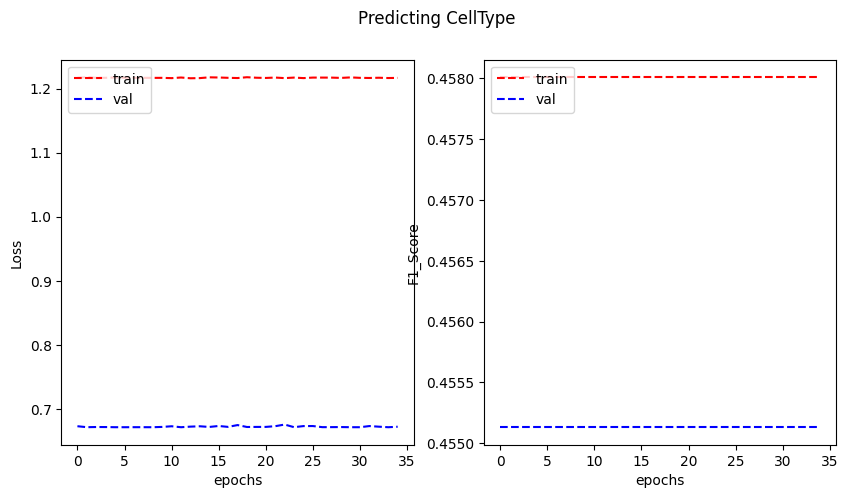

In [88]:
plot_learning_curve(istory_leNet_final.history['loss'], istory_leNet_final.history['val_loss'], 
                    istory_leNet_final.history['f1'], istory_leNet_final.history['val_f1'], 
                    metric_name='F1_Score', suptitle="Predicting CellType")


## 6. Model Performance and Robustness
## Final Model Accuracy

## Robustness and Generalisability
- Because of lack of any examples of 


In [ ]:
# Most simple semi-supervised learning to use for unlabelled data 
# https://www.altexsoft.com/blog/semi-supervised-learning/

predictions = model.predict(train_unlabelled)
score = tf.nn.softmax(pre)

In [ ]:
# Appendix



# Plot of images related to each patient

# for i in range(0, 3):
#     patient = patient_dict[i]
#     num = len(patient)
#     col = 5
#     row = math.ceil(num/col)
#     plt.figure(figsize=(col * 4, row * 4))
#     for j in range(0, len(patient)):
#         # print(j)
#         image_path = patient.iloc[j]['ImageName']
#         # print(image_path)
#         im = imread(f'./Image_classification_data/patch_images/{image_path}', as_gray=True, plugin=None)
#         # print('yes')
#         plt.subplot(num, col, j + 1)
#         plt.title(f'{patient.iloc[j]['InstanceID']}, Cell = {patient.iloc[j]['cellTypeName']}')
#         plt.imshow(im, cmap=plt.cm.gray)
#         plt.axis('off')
#     plt.tight_layout(pad=0.5, h_pad=0.2, w_pad=0.2)
#     plt.show()

   